## DDPG Agent Example

Author: Robin Herrmann
<br>Date: 16. August 2023

### Initialize Environment

In [2]:
import numpy as np
import gymnasium as gym

from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import DDPG

import QArmEnv

2023-08-11 13:22:57.931726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 13:22:58.175311: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 13:22:58.211711: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-11 13:22:58.956106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:
# Register environment
MODULE_NAME = 'QArmEnv'
gym.envs.register(
    id='QArmEnv-v0',
    entry_point=f'{MODULE_NAME}:QArmEnv',
)

In [4]:
# Initialize env
env = gym.make('QArmEnv-v0')
nb_actions = env.action_space.shape[0]
print(env.observation_space.shape)

/home/robin/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


(11,)


### Training

In [4]:
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(nb_actions), sigma=float(0.5)*np.ones(nb_actions))
new_logger = configure('log', ['stdout', 'csv', 'tensorboard'])

model = DDPG(MlpPolicy, env, verbose=1, action_noise=action_noise)
model.set_logger(new_logger)
model.learn(total_timesteps=5000)

env.reset()
env.gzcon.pause()

model.save('ddpg_sb_test2')


Logging to log
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
[INFO] [1691671715.104079400] [QArmEnv]: 0.4904697954955931
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/robin/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not with

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 34.5     |
|    ep_rew_mean     | -111     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 5        |
|    time_elapsed    | 26       |
|    total_timesteps | 138      |
| train/             |          |
|    actor_loss      | 2.01     |
|    critic_loss     | 46.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 32       |
---------------------------------


[INFO] [1691671740.720464305] [QArmEnv]: 0.4938693231181133
[INFO] [1691671740.824415323] [QArmEnv]: 0.46470574399026904
[INFO] [1691671741.026128309] [QArmEnv]: 0.4148311663818938
[INFO] [1691671741.219697848] [QArmEnv]: 0.3730337697589702
[INFO] [1691671741.447556362] [QArmEnv]: 0.3352273641021587
[INFO] [1691671741.656419893] [QArmEnv]: 0.30644145344699486
[INFO] [1691671741.903028275] [QArmEnv]: 0.292131726747578
[INFO] [1691671742.158251388] [QArmEnv]: 0.29089820514297576
[INFO] [1691671742.382554049] [QArmEnv]: 0.3222789754414567
[INFO] [1691671742.561393846] [QArmEnv]: 0.3222789754414567
[INFO] [1691671742.663615851] [QArmEnv]: 0.34348759731847817
[INFO] [1691671742.689618598] [QArmEnv]: 0.34348759731847817
[INFO] [1691671743.095373064] [QArmEnv]: 0.48568469998583086
[INFO] [1691671743.211867919] [QArmEnv]: 0.4461582695556712
[INFO] [1691671743.411532338] [QArmEnv]: 0.4087813057397278
[INFO] [1691671743.591124044] [QArmEnv]: 0.3669362915357995
[INFO] [1691671743.784375599] [QArm

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -54.1    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 5        |
|    time_elapsed    | 36       |
|    total_timesteps | 189      |
| train/             |          |
|    actor_loss      | 1        |
|    critic_loss     | 86.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 83       |
---------------------------------


[INFO] [1691671750.837893654] [QArmEnv]: 0.4913809640497944
[INFO] [1691671750.992337421] [QArmEnv]: 0.4664355846993024
[INFO] [1691671751.129482879] [QArmEnv]: 0.44554939182389736
[INFO] [1691671751.317659397] [QArmEnv]: 0.4297523574048359
[INFO] [1691671751.504016447] [QArmEnv]: 0.42155714708642394
[INFO] [1691671751.770505810] [QArmEnv]: 0.41914079359268763
[INFO] [1691671752.010588341] [QArmEnv]: 0.42471018604860555
[INFO] [1691671752.227541146] [QArmEnv]: 0.43755442239445985
[INFO] [1691671752.386249925] [QArmEnv]: 0.4525400803880215
[INFO] [1691671752.574551825] [QArmEnv]: 0.4773401839313763
[INFO] [1691671752.804820299] [QArmEnv]: 0.5339578805952496
[INFO] [1691671753.025395676] [QArmEnv]: 0.5654223877613596
[INFO] [1691671753.250769558] [QArmEnv]: 0.5984443897081169
[INFO] [1691671753.464012316] [QArmEnv]: 0.6336305251162869
[INFO] [1691671753.663427978] [QArmEnv]: 0.6681048264190705
[INFO] [1691671753.750060758] [QArmEnv]: 0.6681048264190705
[INFO] [1691671754.218106629] [QArm

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -44.3    |
| time/              |          |
|    episodes        | 12       |
|    fps             | 5        |
|    time_elapsed    | 49       |
|    total_timesteps | 247      |
| train/             |          |
|    actor_loss      | 0.663    |
|    critic_loss     | 105      |
|    learning_rate   | 0.001    |
|    n_updates       | 142      |
---------------------------------


[INFO] [1691671763.433526578] [QArmEnv]: 0.21485674429654214
[INFO] [1691671763.458636965] [QArmEnv]: 0.21485674429654214
[INFO] [1691671763.485027309] [QArmEnv]: 0.21485674429654214
[INFO] [1691671763.903630936] [QArmEnv]: 0.4944737417335966
[INFO] [1691671764.056313209] [QArmEnv]: 0.47192981523762806
[INFO] [1691671764.194780621] [QArmEnv]: 0.4424065093578702
[INFO] [1691671764.392583623] [QArmEnv]: 0.40936975718829327
[INFO] [1691671764.613653835] [QArmEnv]: 0.3367269678065457
[INFO] [1691671764.826776548] [QArmEnv]: 0.295310234348977
[INFO] [1691671765.053011947] [QArmEnv]: 0.24874859222960635
[INFO] [1691671765.268580635] [QArmEnv]: 0.2046652357107743
[INFO] [1691671765.493489999] [QArmEnv]: 0.1587819538420016
[INFO] [1691671765.494407056] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671765.792983743] [QArmEnv]: 0.4920751702837001
[INFO] [1691671765.926255665] [QArmEnv]: 0.46031701979299705
[INFO] [1691671766.092111087] [QArmEnv]: 0.4293439375933583
[INFO] [1691671766.2923

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.4     |
|    ep_rew_mean     | -30.9    |
| time/              |          |
|    episodes        | 16       |
|    fps             | 4        |
|    time_elapsed    | 58       |
|    total_timesteps | 294      |
| train/             |          |
|    actor_loss      | -1.61    |
|    critic_loss     | 105      |
|    learning_rate   | 0.001    |
|    n_updates       | 191      |
---------------------------------


[INFO] [1691671773.191522247] [QArmEnv]: 0.15616087088646735
[INFO] [1691671773.192494783] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671773.515112664] [QArmEnv]: 0.4938574540763174
[INFO] [1691671773.670704042] [QArmEnv]: 0.4552965023035626
[INFO] [1691671773.825330474] [QArmEnv]: 0.4137587474579313
[INFO] [1691671773.952957095] [QArmEnv]: 0.3697792213336379
[INFO] [1691671774.083027567] [QArmEnv]: 0.3274358137896462
[INFO] [1691671774.286714775] [QArmEnv]: 0.28311607067536415
[INFO] [1691671774.510369798] [QArmEnv]: 0.2422668836679183
[INFO] [1691671774.716966846] [QArmEnv]: 0.20099021162402875
[INFO] [1691671774.938738897] [QArmEnv]: 0.16577353885995325
[INFO] [1691671775.148713701] [QArmEnv]: 0.14584434057809484
[INFO] [1691671775.150091384] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671775.421486631] [QArmEnv]: 0.4870725023167145
[INFO] [1691671775.575056822] [QArmEnv]: 0.45308874770201835
[INFO] [1691671775.682389752] [QArmEnv]: 0.4256541627985612
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.1     |
|    ep_rew_mean     | -17.2    |
| time/              |          |
|    episodes        | 20       |
|    fps             | 4        |
|    time_elapsed    | 68       |
|    total_timesteps | 341      |
| train/             |          |
|    actor_loss      | -2.42    |
|    critic_loss     | 102      |
|    learning_rate   | 0.001    |
|    n_updates       | 237      |
---------------------------------


[INFO] [1691671782.491581103] [QArmEnv]: 0.15485774584795303
[INFO] [1691671782.492767390] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671782.801156737] [QArmEnv]: 0.4921657320101997
[INFO] [1691671782.938628391] [QArmEnv]: 0.47086759129854117
[INFO] [1691671783.095452851] [QArmEnv]: 0.44704769800249167
[INFO] [1691671783.245335196] [QArmEnv]: 0.42487450362388157
[INFO] [1691671783.492253572] [QArmEnv]: 0.4013416928756666
[INFO] [1691671783.725111193] [QArmEnv]: 0.3780788493997576
[INFO] [1691671783.948307225] [QArmEnv]: 0.35233696331885944
[INFO] [1691671784.211587915] [QArmEnv]: 0.32752031983770175
[INFO] [1691671784.430244428] [QArmEnv]: 0.308901785607413
[INFO] [1691671784.752770001] [QArmEnv]: 0.30783483328480205
[INFO] [1691671785.043954865] [QArmEnv]: 0.25523527415414565
[INFO] [1691671785.287776889] [QArmEnv]: 0.23720722990499096
[INFO] [1691671785.518912447] [QArmEnv]: 0.23795808559036905
[INFO] [1691671785.552353860] [QArmEnv]: 0.2524538157299314
[INFO] [1691671785.9

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16.3     |
|    ep_rew_mean     | -12.6    |
| time/              |          |
|    episodes        | 24       |
|    fps             | 4        |
|    time_elapsed    | 78       |
|    total_timesteps | 392      |
| train/             |          |
|    actor_loss      | -2.09    |
|    critic_loss     | 114      |
|    learning_rate   | 0.001    |
|    n_updates       | 288      |
---------------------------------


[INFO] [1691671793.230670482] [QArmEnv]: 0.12392890979202621
[INFO] [1691671793.231619979] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671793.525319770] [QArmEnv]: 0.49394758274934153
[INFO] [1691671793.756209829] [QArmEnv]: 0.48404343779162784
[INFO] [1691671793.884353173] [QArmEnv]: 0.4592579333404333
[INFO] [1691671794.058830104] [QArmEnv]: 0.43090960715265214
[INFO] [1691671794.302555183] [QArmEnv]: 0.37385799235031064
[INFO] [1691671794.545371380] [QArmEnv]: 0.35191817952886273
[INFO] [1691671794.750552013] [QArmEnv]: 0.33136932963186605
[INFO] [1691671794.973069556] [QArmEnv]: 0.3121713534350972
[INFO] [1691671795.162399032] [QArmEnv]: 0.28772218235078667
[INFO] [1691671795.446212502] [QArmEnv]: 0.30713964770410107
[INFO] [1691671795.676189393] [QArmEnv]: 0.2789789568516099
[INFO] [1691671795.892307575] [QArmEnv]: 0.27079470708936987
[INFO] [1691671796.128131979] [QArmEnv]: 0.2672239419810292
[INFO] [1691671796.338455865] [QArmEnv]: 0.266835958018121
[INFO] [1691671796.5

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.9     |
|    ep_rew_mean     | -7.73    |
| time/              |          |
|    episodes        | 28       |
|    fps             | 4        |
|    time_elapsed    | 90       |
|    total_timesteps | 444      |
| train/             |          |
|    actor_loss      | -3.89    |
|    critic_loss     | 96.6     |
|    learning_rate   | 0.001    |
|    n_updates       | 340      |
---------------------------------


[INFO] [1691671804.968987476] [QArmEnv]: 0.12814278284254704
[INFO] [1691671804.970227939] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671805.430381746] [QArmEnv]: 0.4948700260209236
[INFO] [1691671805.677413278] [QArmEnv]: 0.45023162328999194
[INFO] [1691671805.881991860] [QArmEnv]: 0.4151730425301345
[INFO] [1691671806.016970428] [QArmEnv]: 0.3767929147867531
[INFO] [1691671806.234174271] [QArmEnv]: 0.29589727261640336
[INFO] [1691671806.440005740] [QArmEnv]: 0.2574590777980878
[INFO] [1691671806.688571974] [QArmEnv]: 0.214786279695664
[INFO] [1691671806.921036042] [QArmEnv]: 0.1779097894478874
[INFO] [1691671807.124958994] [QArmEnv]: 0.15252362740375966
[INFO] [1691671807.125824601] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671807.416688057] [QArmEnv]: 0.49452536630172994
[INFO] [1691671807.560591893] [QArmEnv]: 0.4292046876785685
[INFO] [1691671807.671536125] [QArmEnv]: 0.3904051748364985
[INFO] [1691671807.781553651] [QArmEnv]: 0.3495986940266689
[INFO] [169167

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.1     |
|    ep_rew_mean     | -6.43    |
| time/              |          |
|    episodes        | 32       |
|    fps             | 4        |
|    time_elapsed    | 98       |
|    total_timesteps | 484      |
| train/             |          |
|    actor_loss      | -5.16    |
|    critic_loss     | 144      |
|    learning_rate   | 0.001    |
|    n_updates       | 380      |
---------------------------------


[INFO] [1691671812.611087442] [QArmEnv]: 0.14839866486855174
[INFO] [1691671812.611637250] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671812.912425113] [QArmEnv]: 0.49432505572919655
[INFO] [1691671813.093627773] [QArmEnv]: 0.46280063106069896
[INFO] [1691671813.200476613] [QArmEnv]: 0.42742124679012666
[INFO] [1691671813.310612164] [QArmEnv]: 0.3952936949906995
[INFO] [1691671813.411561993] [QArmEnv]: 0.3628513871608457
[INFO] [1691671813.511408125] [QArmEnv]: 0.3291071992164633
[INFO] [1691671813.616339706] [QArmEnv]: 0.2963641717729742
[INFO] [1691671813.726284881] [QArmEnv]: 0.2645135628597025
[INFO] [1691671813.832065839] [QArmEnv]: 0.23654309176989224
[INFO] [1691671813.980853167] [QArmEnv]: 0.21445227712607712
[INFO] [1691671814.157353515] [QArmEnv]: 0.20329646158253747
[INFO] [1691671814.192398027] [QArmEnv]: 0.20329646158253747
[INFO] [1691671814.212673019] [QArmEnv]: 0.20329646158253747
[INFO] [1691671814.252974451] [QArmEnv]: 0.20329646158253747
[INFO] [1691671814.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.8     |
|    ep_rew_mean     | -6.66    |
| time/              |          |
|    episodes        | 36       |
|    fps             | 5        |
|    time_elapsed    | 105      |
|    total_timesteps | 533      |
| train/             |          |
|    actor_loss      | -4       |
|    critic_loss     | 137      |
|    learning_rate   | 0.001    |
|    n_updates       | 429      |
---------------------------------


[INFO] [1691671819.856685092] [QArmEnv]: 0.48610468614073976
[INFO] [1691671819.986890389] [QArmEnv]: 0.448231758611693
[INFO] [1691671820.086741320] [QArmEnv]: 0.4133057233474755
[INFO] [1691671820.199123082] [QArmEnv]: 0.3779499752119669
[INFO] [1691671820.304271892] [QArmEnv]: 0.3455037031701278
[INFO] [1691671820.411541330] [QArmEnv]: 0.31067461723918305
[INFO] [1691671820.519511138] [QArmEnv]: 0.2773904112717884
[INFO] [1691671820.627933085] [QArmEnv]: 0.24526027184151786
[INFO] [1691671820.746957891] [QArmEnv]: 0.21397502085540873
[INFO] [1691671820.961522302] [QArmEnv]: 0.19259177236526273
[INFO] [1691671821.011794757] [QArmEnv]: 0.19259177236526273
[INFO] [1691671821.048010726] [QArmEnv]: 0.17186003760910123
[INFO] [1691671821.076148949] [QArmEnv]: 0.17186003760910123
[INFO] [1691671821.109674244] [QArmEnv]: 0.17186003760910123
[INFO] [1691671821.134369903] [QArmEnv]: 0.17186003760910123
[INFO] [1691671821.393445056] [QArmEnv]: 0.4947365435732012
[INFO] [1691671821.535500740] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.4     |
|    ep_rew_mean     | -7.41    |
| time/              |          |
|    episodes        | 40       |
|    fps             | 5        |
|    time_elapsed    | 112      |
|    total_timesteps | 576      |
| train/             |          |
|    actor_loss      | -5.67    |
|    critic_loss     | 119      |
|    learning_rate   | 0.001    |
|    n_updates       | 473      |
---------------------------------


[INFO] [1691671826.734534530] [QArmEnv]: 0.15939834662240387
[INFO] [1691671826.735386577] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671827.028533266] [QArmEnv]: 0.48922352095598864
[INFO] [1691671827.171636483] [QArmEnv]: 0.4469209399292928
[INFO] [1691671827.321364041] [QArmEnv]: 0.40767073699968076
[INFO] [1691671827.574505646] [QArmEnv]: 0.362714118662707
[INFO] [1691671827.778412917] [QArmEnv]: 0.32000985869456633
[INFO] [1691671828.006756644] [QArmEnv]: 0.27674599214266465
[INFO] [1691671828.284546341] [QArmEnv]: 0.23639114384206347
[INFO] [1691671828.581080841] [QArmEnv]: 0.20011986471850393
[INFO] [1691671828.847694685] [QArmEnv]: 0.17110236925251185
[INFO] [1691671828.915207156] [QArmEnv]: 0.1711023692703754
[INFO] [1691671829.206831141] [QArmEnv]: 0.4944520273685033
[INFO] [1691671829.347894709] [QArmEnv]: 0.47474392841762997
[INFO] [1691671829.452804268] [QArmEnv]: 0.4327315870883402
[INFO] [1691671829.564361206] [QArmEnv]: 0.3904870119885301
[INFO] [1691671829.67

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14       |
|    ep_rew_mean     | -9.19    |
| time/              |          |
|    episodes        | 44       |
|    fps             | 5        |
|    time_elapsed    | 120      |
|    total_timesteps | 618      |
| train/             |          |
|    actor_loss      | -3.72    |
|    critic_loss     | 124      |
|    learning_rate   | 0.001    |
|    n_updates       | 514      |
---------------------------------


[INFO] [1691671835.121615019] [QArmEnv]: 0.17205687428147504
[INFO] [1691671835.618765472] [QArmEnv]: 0.4942709508631492
[INFO] [1691671835.814455520] [QArmEnv]: 0.4522688892914412
[INFO] [1691671835.957827630] [QArmEnv]: 0.4117039335977396
[INFO] [1691671836.161959730] [QArmEnv]: 0.3737023697563729
[INFO] [1691671836.346807746] [QArmEnv]: 0.3312809788946733
[INFO] [1691671836.561933983] [QArmEnv]: 0.29411267894869575
[INFO] [1691671836.788055595] [QArmEnv]: 0.2567493400346646
[INFO] [1691671837.001216304] [QArmEnv]: 0.22302412646817096
[INFO] [1691671837.270435212] [QArmEnv]: 0.1891534442209124
[INFO] [1691671837.513221061] [QArmEnv]: 0.16107874320817453
[INFO] [1691671837.666608349] [QArmEnv]: 0.14854448691319697
[INFO] [1691671837.666941589] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671837.984103077] [QArmEnv]: 0.4836685997260472
[INFO] [1691671838.127560324] [QArmEnv]: 0.4407231997940191
[INFO] [1691671838.247043228] [QArmEnv]: 0.402611631801548
[INFO] [1691671838.450944

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.8     |
|    ep_rew_mean     | -7.62    |
| time/              |          |
|    episodes        | 48       |
|    fps             | 5        |
|    time_elapsed    | 130      |
|    total_timesteps | 661      |
| train/             |          |
|    actor_loss      | -5.22    |
|    critic_loss     | 124      |
|    learning_rate   | 0.001    |
|    n_updates       | 558      |
---------------------------------


[INFO] [1691671844.758583048] [QArmEnv]: 0.14728466622142114
[INFO] [1691671844.759530382] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671845.135096602] [QArmEnv]: 0.4840701978419282
[INFO] [1691671845.260698798] [QArmEnv]: 0.43909312923176025
[INFO] [1691671845.537809910] [QArmEnv]: 0.3995561210230014
[INFO] [1691671845.777921437] [QArmEnv]: 0.3550625292024375
[INFO] [1691671846.013665780] [QArmEnv]: 0.31493518996228603
[INFO] [1691671846.243532282] [QArmEnv]: 0.27385095840392903
[INFO] [1691671846.484872392] [QArmEnv]: 0.23793028764986454
[INFO] [1691671846.794404215] [QArmEnv]: 0.19659601237566734
[INFO] [1691671846.984504385] [QArmEnv]: 0.16359474835565135
[INFO] [1691671847.144605844] [QArmEnv]: 0.14061027757924355
[INFO] [1691671847.145951422] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671847.522939247] [QArmEnv]: 0.48441687514539816
[INFO] [1691671847.640691351] [QArmEnv]: 0.4459272756857136
[INFO] [1691671847.877099231] [QArmEnv]: 0.40982928903446747
[INFO] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.5     |
|    ep_rew_mean     | -5.45    |
| time/              |          |
|    episodes        | 52       |
|    fps             | 5        |
|    time_elapsed    | 140      |
|    total_timesteps | 702      |
| train/             |          |
|    actor_loss      | -5.59    |
|    critic_loss     | 112      |
|    learning_rate   | 0.001    |
|    n_updates       | 598      |
---------------------------------


[INFO] [1691671854.786115677] [QArmEnv]: 0.4915531987039062
[INFO] [1691671854.900748616] [QArmEnv]: 0.4528010203986584
[INFO] [1691671855.083296463] [QArmEnv]: 0.4136349148336308
[INFO] [1691671855.289102866] [QArmEnv]: 0.3679557286069936
[INFO] [1691671855.528049853] [QArmEnv]: 0.32330591185183716
[INFO] [1691671855.763665795] [QArmEnv]: 0.28255200275623293
[INFO] [1691671856.051542768] [QArmEnv]: 0.2001007237829297
[INFO] [1691671856.339648935] [QArmEnv]: 0.16520819644918777
[INFO] [1691671856.628867758] [QArmEnv]: 0.1529562962559292
[INFO] [1691671856.630122163] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671857.081292901] [QArmEnv]: 0.4943098424912498
[INFO] [1691671857.193737992] [QArmEnv]: 0.452468843828677
[INFO] [1691671857.449143391] [QArmEnv]: 0.4098448502393599
[INFO] [1691671857.677438100] [QArmEnv]: 0.32049357343879464
[INFO] [1691671857.901722370] [QArmEnv]: 0.2797169985172658
[INFO] [1691671858.136280954] [QArmEnv]: 0.2392871955925596
[INFO] [1691671858.3409403

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.2     |
|    ep_rew_mean     | -2.98    |
| time/              |          |
|    episodes        | 56       |
|    fps             | 4        |
|    time_elapsed    | 149      |
|    total_timesteps | 739      |
| train/             |          |
|    actor_loss      | -6       |
|    critic_loss     | 135      |
|    learning_rate   | 0.001    |
|    n_updates       | 636      |
---------------------------------


[INFO] [1691671863.584512311] [QArmEnv]: 0.1485834900244065
[INFO] [1691671863.585742270] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671863.912944315] [QArmEnv]: 0.49408389652465146
[INFO] [1691671864.091513848] [QArmEnv]: 0.46066020873036073
[INFO] [1691671864.243439772] [QArmEnv]: 0.4237195025289853
[INFO] [1691671864.528668299] [QArmEnv]: 0.38493550579367103
[INFO] [1691671864.761597648] [QArmEnv]: 0.35080343967236943
[INFO] [1691671864.976427869] [QArmEnv]: 0.31673348317599037
[INFO] [1691671865.211403391] [QArmEnv]: 0.28517132220450964
[INFO] [1691671865.457948137] [QArmEnv]: 0.2244601705806967
[INFO] [1691671865.685162066] [QArmEnv]: 0.19679812417947504
[INFO] [1691671865.921734835] [QArmEnv]: 0.1739241754777879
[INFO] [1691671866.182980046] [QArmEnv]: 0.15581556696738577
[INFO] [1691671866.183964588] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671866.493750391] [QArmEnv]: 0.485131645120538
[INFO] [1691671866.651513307] [QArmEnv]: 0.44187105176750685
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.1     |
|    ep_rew_mean     | 2.58     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 4        |
|    time_elapsed    | 159      |
|    total_timesteps | 783      |
| train/             |          |
|    actor_loss      | -6.5     |
|    critic_loss     | 122      |
|    learning_rate   | 0.001    |
|    n_updates       | 676      |
---------------------------------


[INFO] [1691671874.156760486] [QArmEnv]: 0.1586362359458244
[INFO] [1691671874.157688045] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671874.709252158] [QArmEnv]: 0.49418320143126226
[INFO] [1691671874.822625790] [QArmEnv]: 0.45990690174847243
[INFO] [1691671875.015767786] [QArmEnv]: 0.42449778459170545
[INFO] [1691671875.187892450] [QArmEnv]: 0.3827705638879748
[INFO] [1691671875.398706445] [QArmEnv]: 0.3413292958798736
[INFO] [1691671875.656519225] [QArmEnv]: 0.3029417795790055
[INFO] [1691671875.931349486] [QArmEnv]: 0.21935331088044774
[INFO] [1691671876.196730636] [QArmEnv]: 0.1788407628744576
[INFO] [1691671876.437954300] [QArmEnv]: 0.13924031928039496
[INFO] [1691671876.438863526] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671876.797060179] [QArmEnv]: 0.48516442677032406
[INFO] [1691671876.949349799] [QArmEnv]: 0.44313802390895285
[INFO] [1691671877.189511528] [QArmEnv]: 0.40955793801399587
[INFO] [1691671877.444041573] [QArmEnv]: 0.37110377396494937
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13       |
|    ep_rew_mean     | 4.04     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 4        |
|    time_elapsed    | 170      |
|    total_timesteps | 831      |
| train/             |          |
|    actor_loss      | -9.42    |
|    critic_loss     | 110      |
|    learning_rate   | 0.001    |
|    n_updates       | 728      |
---------------------------------


[INFO] [1691671884.534702913] [QArmEnv]: 0.1561730035872872
[INFO] [1691671884.535868994] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671884.869416116] [QArmEnv]: 0.49382067489248205
[INFO] [1691671885.018438205] [QArmEnv]: 0.45907570810662973
[INFO] [1691671885.158569166] [QArmEnv]: 0.42338597051269394
[INFO] [1691671885.371359742] [QArmEnv]: 0.38385756084576256
[INFO] [1691671885.592412983] [QArmEnv]: 0.34534991463632875
[INFO] [1691671885.824673901] [QArmEnv]: 0.30520307559476323
[INFO] [1691671886.065424394] [QArmEnv]: 0.2690625385348885
[INFO] [1691671886.307507530] [QArmEnv]: 0.2344321127938321
[INFO] [1691671886.557981862] [QArmEnv]: 0.20855225066415123
[INFO] [1691671886.835892924] [QArmEnv]: 0.19225978227788812
[INFO] [1691671886.896925418] [QArmEnv]: 0.19072097657846057
[INFO] [1691671886.921678232] [QArmEnv]: 0.19072097657846057
[INFO] [1691671886.972142723] [QArmEnv]: 0.19072097657846057
[INFO] [1691671887.287752946] [QArmEnv]: 0.4938624358428109
[INFO] [1691671887

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 6.38     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 4        |
|    time_elapsed    | 179      |
|    total_timesteps | 874      |
| train/             |          |
|    actor_loss      | -9.98    |
|    critic_loss     | 136      |
|    learning_rate   | 0.001    |
|    n_updates       | 771      |
---------------------------------


[INFO] [1691671894.071500024] [QArmEnv]: 0.49401407683513443
[INFO] [1691671894.220073294] [QArmEnv]: 0.4710878095179289
[INFO] [1691671894.397021843] [QArmEnv]: 0.43621448065876833
[INFO] [1691671894.613399150] [QArmEnv]: 0.40030116149295586
[INFO] [1691671894.806581420] [QArmEnv]: 0.3650161638010227
[INFO] [1691671895.058060234] [QArmEnv]: 0.3246854413384265
[INFO] [1691671895.317679895] [QArmEnv]: 0.2866198633128885
[INFO] [1691671895.496036599] [QArmEnv]: 0.2072329337954529
[INFO] [1691671895.705475983] [QArmEnv]: 0.16748764605607327
[INFO] [1691671895.927339927] [QArmEnv]: 0.13150011157019703
[INFO] [1691671895.928711496] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671896.263399712] [QArmEnv]: 0.49375246637245784
[INFO] [1691671896.455019027] [QArmEnv]: 0.4652309332168315
[INFO] [1691671896.604037513] [QArmEnv]: 0.4321233652931226
[INFO] [1691671896.833997950] [QArmEnv]: 0.3930020826636269
[INFO] [1691671897.023668493] [QArmEnv]: 0.35542943169611374
[INFO] [1691671897.203

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.8     |
|    ep_rew_mean     | 9.4      |
| time/              |          |
|    episodes        | 72       |
|    fps             | 4        |
|    time_elapsed    | 189      |
|    total_timesteps | 921      |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 127      |
|    learning_rate   | 0.001    |
|    n_updates       | 815      |
---------------------------------


[INFO] [1691671904.112012252] [QArmEnv]: 0.13549417727678684
[INFO] [1691671904.112855534] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671904.523500836] [QArmEnv]: 0.4940352702081633
[INFO] [1691671904.645099352] [QArmEnv]: 0.4752680674323476
[INFO] [1691671904.755219101] [QArmEnv]: 0.4471703212464748
[INFO] [1691671904.861796970] [QArmEnv]: 0.4169977120981603
[INFO] [1691671904.962118580] [QArmEnv]: 0.38321043893225126
[INFO] [1691671905.065131643] [QArmEnv]: 0.3485385393685593
[INFO] [1691671905.166529587] [QArmEnv]: 0.31570617437636006
[INFO] [1691671905.267403564] [QArmEnv]: 0.28328961748203707
[INFO] [1691671905.370829500] [QArmEnv]: 0.24858335550733762
[INFO] [1691671905.487622628] [QArmEnv]: 0.21047562248872811
[INFO] [1691671905.603300279] [QArmEnv]: 0.17676947710479374
[INFO] [1691671905.810962073] [QArmEnv]: 0.1586642384693766
[INFO] [1691671905.811928311] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671906.134778473] [QArmEnv]: 0.4945565601832108
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | 12.6     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 4        |
|    time_elapsed    | 196      |
|    total_timesteps | 965      |
| train/             |          |
|    actor_loss      | -11.5    |
|    critic_loss     | 137      |
|    learning_rate   | 0.001    |
|    n_updates       | 860      |
---------------------------------


[INFO] [1691671911.061893363] [QArmEnv]: 0.15698700387066827
[INFO] [1691671911.062648178] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671911.436600811] [QArmEnv]: 0.4938550411315729
[INFO] [1691671911.564903422] [QArmEnv]: 0.46790116040076135
[INFO] [1691671911.746567176] [QArmEnv]: 0.4340431053026299
[INFO] [1691671911.940774217] [QArmEnv]: 0.4002313870496272
[INFO] [1691671912.189340244] [QArmEnv]: 0.36789692083644876
[INFO] [1691671912.361321179] [QArmEnv]: 0.3333175086501466
[INFO] [1691671912.585819809] [QArmEnv]: 0.3015184541577013
[INFO] [1691671912.823787414] [QArmEnv]: 0.2671904663165299
[INFO] [1691671913.086126515] [QArmEnv]: 0.23385614475702615
[INFO] [1691671913.314465881] [QArmEnv]: 0.19974718012287204
[INFO] [1691671913.528381839] [QArmEnv]: 0.16797976466653539
[INFO] [1691671913.740994759] [QArmEnv]: 0.1333333350239653
[INFO] [1691671913.741854514] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671914.136597595] [QArmEnv]: 0.4938270055563369
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.6     |
|    ep_rew_mean     | 15.8     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 4        |
|    time_elapsed    | 206      |
|    total_timesteps | 1011     |
| train/             |          |
|    actor_loss      | -15.6    |
|    critic_loss     | 107      |
|    learning_rate   | 0.001    |
|    n_updates       | 904      |
---------------------------------


[INFO] [1691671920.342218287] [QArmEnv]: 0.15375295702346556
[INFO] [1691671920.343253982] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671920.703817357] [QArmEnv]: 0.49481176042431957
[INFO] [1691671920.960549853] [QArmEnv]: 0.47711978736794713
[INFO] [1691671921.070913623] [QArmEnv]: 0.4429271307715081
[INFO] [1691671921.282293554] [QArmEnv]: 0.4042704161788377
[INFO] [1691671921.497224158] [QArmEnv]: 0.36148528731017965
[INFO] [1691671921.696500027] [QArmEnv]: 0.3236820444611761
[INFO] [1691671921.928180099] [QArmEnv]: 0.28170438803925074
[INFO] [1691671922.155644189] [QArmEnv]: 0.20886370357867784
[INFO] [1691671922.383962613] [QArmEnv]: 0.1836013001517188
[INFO] [1691671922.574358426] [QArmEnv]: 0.1836013001517188
[INFO] [1691671922.616325732] [QArmEnv]: 0.15628549608249095
[INFO] [1691671922.617684167] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671922.956988950] [QArmEnv]: 0.49102214910416636
[INFO] [1691671923.196303062] [QArmEnv]: 0.47447340914605424
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.5     |
|    ep_rew_mean     | 18.1     |
| time/              |          |
|    episodes        | 84       |
|    fps             | 4        |
|    time_elapsed    | 214      |
|    total_timesteps | 1050     |
| train/             |          |
|    actor_loss      | -15.9    |
|    critic_loss     | 94.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 947      |
---------------------------------


[INFO] [1691671929.088111639] [QArmEnv]: 0.1562528427709727
[INFO] [1691671929.089591368] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671929.597253276] [QArmEnv]: 0.49469407879607413
[INFO] [1691671929.882006763] [QArmEnv]: 0.4616093020181268
[INFO] [1691671929.997879901] [QArmEnv]: 0.4241922964743011
[INFO] [1691671930.204313871] [QArmEnv]: 0.34669280177290956
[INFO] [1691671930.424780134] [QArmEnv]: 0.30836429191222176
[INFO] [1691671930.646650120] [QArmEnv]: 0.273084413373137
[INFO] [1691671930.898480937] [QArmEnv]: 0.23250796573667232
[INFO] [1691671931.144502137] [QArmEnv]: 0.19106116978126159
[INFO] [1691671931.388907017] [QArmEnv]: 0.14922093758183497
[INFO] [1691671931.389935646] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671931.709067637] [QArmEnv]: 0.4934936566402758
[INFO] [1691671931.868601485] [QArmEnv]: 0.45843930067647837
[INFO] [1691671932.022459698] [QArmEnv]: 0.4244662347673476
[INFO] [1691671932.254898431] [QArmEnv]: 0.3910974653818428
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.6     |
|    ep_rew_mean     | 17.5     |
| time/              |          |
|    episodes        | 88       |
|    fps             | 4        |
|    time_elapsed    | 226      |
|    total_timesteps | 1109     |
| train/             |          |
|    actor_loss      | -17.1    |
|    critic_loss     | 119      |
|    learning_rate   | 0.001    |
|    n_updates       | 995      |
---------------------------------


[INFO] [1691671941.099358636] [QArmEnv]: 0.17566746391037272
[INFO] [1691671941.138766585] [QArmEnv]: 0.17566746391037272
[INFO] [1691671941.165664844] [QArmEnv]: 0.17566746391037272
[INFO] [1691671941.675396806] [QArmEnv]: 0.49394352950334497
[INFO] [1691671941.878778169] [QArmEnv]: 0.46594411829762306
[INFO] [1691671941.985184432] [QArmEnv]: 0.4418365786271749
[INFO] [1691671942.090143988] [QArmEnv]: 0.41484996997908263
[INFO] [1691671942.202959453] [QArmEnv]: 0.386823212241681
[INFO] [1691671942.309259019] [QArmEnv]: 0.3612107183138904
[INFO] [1691671942.410529568] [QArmEnv]: 0.3339891892717814
[INFO] [1691671942.513945193] [QArmEnv]: 0.306324973467786
[INFO] [1691671942.619062933] [QArmEnv]: 0.27879245448503787
[INFO] [1691671942.724593569] [QArmEnv]: 0.2484649790623301
[INFO] [1691671942.833308173] [QArmEnv]: 0.218038342749421
[INFO] [1691671942.940840904] [QArmEnv]: 0.1879313477054583
[INFO] [1691671943.164578729] [QArmEnv]: 0.16187582957512467
[INFO] [1691671943.465278443] [QArm

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | 19.6     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 4        |
|    time_elapsed    | 237      |
|    total_timesteps | 1164     |
| train/             |          |
|    actor_loss      | -18.9    |
|    critic_loss     | 107      |
|    learning_rate   | 0.001    |
|    n_updates       | 1058     |
---------------------------------


[INFO] [1691671951.792593474] [QArmEnv]: 0.13398484097472724
[INFO] [1691671951.793562541] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671952.211022592] [QArmEnv]: 0.4942274316594276
[INFO] [1691671952.373703812] [QArmEnv]: 0.4818307494745862
[INFO] [1691671952.521663175] [QArmEnv]: 0.4576706910177445
[INFO] [1691671952.720955722] [QArmEnv]: 0.39835923864825845
[INFO] [1691671952.938433284] [QArmEnv]: 0.3694224503207316
[INFO] [1691671953.189388116] [QArmEnv]: 0.3389423874072183
[INFO] [1691671953.357527113] [QArmEnv]: 0.30139564478233716
[INFO] [1691671953.541758865] [QArmEnv]: 0.25839005095926604
[INFO] [1691671953.785062661] [QArmEnv]: 0.2113266280474822
[INFO] [1691671954.046336953] [QArmEnv]: 0.16802164558597607
[INFO] [1691671954.328346319] [QArmEnv]: 0.13018480003246918
[INFO] [1691671954.329599732] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671954.688114997] [QArmEnv]: 0.4939766226878795
[INFO] [1691671954.831259969] [QArmEnv]: 0.46675437337806086
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | 22       |
| time/              |          |
|    episodes        | 96       |
|    fps             | 4        |
|    time_elapsed    | 248      |
|    total_timesteps | 1217     |
| train/             |          |
|    actor_loss      | -19.2    |
|    critic_loss     | 124      |
|    learning_rate   | 0.001    |
|    n_updates       | 1111     |
---------------------------------


[INFO] [1691671962.466769169] [QArmEnv]: 0.14094259469440926
[INFO] [1691671962.467628963] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671962.878945219] [QArmEnv]: 0.49473209853030087
[INFO] [1691671963.063409965] [QArmEnv]: 0.4849324805045925
[INFO] [1691671963.165076915] [QArmEnv]: 0.460076680759588
[INFO] [1691671963.264324162] [QArmEnv]: 0.4298282543539014
[INFO] [1691671963.376014860] [QArmEnv]: 0.36772594648605766
[INFO] [1691671963.488098685] [QArmEnv]: 0.34040558775829416
[INFO] [1691671963.590215199] [QArmEnv]: 0.3125686096019166
[INFO] [1691671963.694632250] [QArmEnv]: 0.2891506648391485
[INFO] [1691671963.806742841] [QArmEnv]: 0.2669554163686179
[INFO] [1691671963.908434181] [QArmEnv]: 0.24781692374911599
[INFO] [1691671964.018810590] [QArmEnv]: 0.22938787854472364
[INFO] [1691671964.131647265] [QArmEnv]: 0.21433818284009065
[INFO] [1691671964.243583614] [QArmEnv]: 0.1997845151284821
[INFO] [1691671964.345637404] [QArmEnv]: 0.187609866189611
[INFO] [1691671964.51044

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | 23.5     |
| time/              |          |
|    episodes        | 100      |
|    fps             | 4        |
|    time_elapsed    | 257      |
|    total_timesteps | 1266     |
| train/             |          |
|    actor_loss      | -21.2    |
|    critic_loss     | 99.6     |
|    learning_rate   | 0.001    |
|    n_updates       | 1161     |
---------------------------------


[INFO] [1691671971.927045626] [QArmEnv]: 0.14373748694722963
[INFO] [1691671971.927958753] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671972.422888777] [QArmEnv]: 0.4938709539258054
[INFO] [1691671972.622461279] [QArmEnv]: 0.47132309838470743
[INFO] [1691671972.773039134] [QArmEnv]: 0.4477726107402424
[INFO] [1691671972.984809447] [QArmEnv]: 0.42206466823316746
[INFO] [1691671973.206409180] [QArmEnv]: 0.39264706173825814
[INFO] [1691671973.509583870] [QArmEnv]: 0.36202930883190065
[INFO] [1691671973.770233885] [QArmEnv]: 0.3326454101432183
[INFO] [1691671973.995591451] [QArmEnv]: 0.30323257201355747
[INFO] [1691671974.251286392] [QArmEnv]: 0.2756497567890932
[INFO] [1691671974.569970326] [QArmEnv]: 0.23622082199592245
[INFO] [1691671974.832782555] [QArmEnv]: 0.20757362652781644
[INFO] [1691671975.096480656] [QArmEnv]: 0.1831021140356494
[INFO] [1691671975.338376197] [QArmEnv]: 0.15216470753282446
[INFO] [1691671975.339093333] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.7     |
|    ep_rew_mean     | 30.2     |
| time/              |          |
|    episodes        | 104      |
|    fps             | 4        |
|    time_elapsed    | 269      |
|    total_timesteps | 1310     |
| train/             |          |
|    actor_loss      | -22      |
|    critic_loss     | 98.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 1206     |
---------------------------------


[INFO] [1691671983.724571536] [QArmEnv]: 0.1463925165030408
[INFO] [1691671983.725685793] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671984.146268140] [QArmEnv]: 0.49540127129858175
[INFO] [1691671984.437624839] [QArmEnv]: 0.4923820697982108
[INFO] [1691671984.728161266] [QArmEnv]: 0.394183167871305
[INFO] [1691671984.899174341] [QArmEnv]: 0.35644801676221927
[INFO] [1691671985.116696655] [QArmEnv]: 0.3179115241542854
[INFO] [1691671985.358587605] [QArmEnv]: 0.28151142529478707
[INFO] [1691671985.605687068] [QArmEnv]: 0.24900457690624367
[INFO] [1691671985.841636949] [QArmEnv]: 0.2134661402474029
[INFO] [1691671986.065954141] [QArmEnv]: 0.1825851654788564
[INFO] [1691671986.274254210] [QArmEnv]: 0.15186997373543834
[INFO] [1691671986.274919039] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691671986.620096901] [QArmEnv]: 0.4939954045770445
[INFO] [1691671986.793554778] [QArmEnv]: 0.46303772308892865
[INFO] [1691671987.031024537] [QArmEnv]: 0.4144747444503226
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.6     |
|    ep_rew_mean     | 31.9     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 4        |
|    time_elapsed    | 277      |
|    total_timesteps | 1349     |
| train/             |          |
|    actor_loss      | -21.5    |
|    critic_loss     | 137      |
|    learning_rate   | 0.001    |
|    n_updates       | 1245     |
---------------------------------


[INFO] [1691671992.426088148] [QArmEnv]: 0.4921321286374991
[INFO] [1691671992.722585847] [QArmEnv]: 0.43414607436599034
[INFO] [1691671992.886104735] [QArmEnv]: 0.39066409695255794
[INFO] [1691671993.135063483] [QArmEnv]: 0.35291974876180654
[INFO] [1691671993.341616655] [QArmEnv]: 0.3285573415489319
[INFO] [1691671993.482439733] [QArmEnv]: 0.30639211079832235
[INFO] [1691671993.731693063] [QArmEnv]: 0.28535828243676964
[INFO] [1691671993.965805876] [QArmEnv]: 0.2447925030175535
[INFO] [1691671994.172314853] [QArmEnv]: 0.2206965059122225
[INFO] [1691671994.299615828] [QArmEnv]: 0.2206965059122225
[INFO] [1691671994.609916197] [QArmEnv]: 0.49401285638133435
[INFO] [1691671994.808984830] [QArmEnv]: 0.43846666944339396
[INFO] [1691671994.995671354] [QArmEnv]: 0.3977935335351881
[INFO] [1691671995.223672595] [QArmEnv]: 0.361290957367715
[INFO] [1691671995.449247861] [QArmEnv]: 0.3326195802173976
[INFO] [1691671995.604864542] [QArmEnv]: 0.30740921525191506
[INFO] [1691671995.785298320] [QA

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 31.9     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 4        |
|    time_elapsed    | 286      |
|    total_timesteps | 1389     |
| train/             |          |
|    actor_loss      | -22.6    |
|    critic_loss     | 111      |
|    learning_rate   | 0.001    |
|    n_updates       | 1285     |
---------------------------------


[INFO] [1691672000.780550624] [QArmEnv]: 0.4938259047666374
[INFO] [1691672000.922548687] [QArmEnv]: 0.4491691836273736
[INFO] [1691672001.033166578] [QArmEnv]: 0.40565967900490524
[INFO] [1691672001.234290817] [QArmEnv]: 0.3757169686498851
[INFO] [1691672001.467761642] [QArmEnv]: 0.3529395597675669
[INFO] [1691672001.632422572] [QArmEnv]: 0.3334279007136466
[INFO] [1691672001.845191806] [QArmEnv]: 0.30944686768132973
[INFO] [1691672002.025917199] [QArmEnv]: 0.28679354756478237
[INFO] [1691672002.184161205] [QArmEnv]: 0.2589437117080865
[INFO] [1691672002.401826322] [QArmEnv]: 0.22766504892743042
[INFO] [1691672002.619599445] [QArmEnv]: 0.1981230133449485
[INFO] [1691672002.660087272] [QArmEnv]: 0.1981230133449485
[INFO] [1691672003.104367950] [QArmEnv]: 0.4941287315533288
[INFO] [1691672003.302511897] [QArmEnv]: 0.43961033356158485
[INFO] [1691672003.462025515] [QArmEnv]: 0.3962596039315976
[INFO] [1691672003.661318581] [QArmEnv]: 0.3620111208056739
[INFO] [1691672003.881313078] [QArm

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 31.2     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 4        |
|    time_elapsed    | 295      |
|    total_timesteps | 1433     |
| train/             |          |
|    actor_loss      | -23      |
|    critic_loss     | 107      |
|    learning_rate   | 0.001    |
|    n_updates       | 1328     |
---------------------------------


[INFO] [1691672009.910351446] [QArmEnv]: 0.14937282505496352
[INFO] [1691672009.911059522] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672010.522503940] [QArmEnv]: 0.49405755017908576
[INFO] [1691672010.702215423] [QArmEnv]: 0.4694529967587312
[INFO] [1691672010.910334506] [QArmEnv]: 0.4191727357234944
[INFO] [1691672011.137115007] [QArmEnv]: 0.37754093419442997
[INFO] [1691672011.359166891] [QArmEnv]: 0.34559286171981285
[INFO] [1691672011.521571539] [QArmEnv]: 0.31954323072642454
[INFO] [1691672011.751284847] [QArmEnv]: 0.2647010745729822
[INFO] [1691672011.903678473] [QArmEnv]: 0.23561476061326136
[INFO] [1691672012.074317472] [QArmEnv]: 0.20512825480788716
[INFO] [1691672012.255730897] [QArmEnv]: 0.17894785547369854
[INFO] [1691672012.514688875] [QArmEnv]: 0.15909909692359242
[INFO] [1691672012.516838783] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672013.383132808] [QArmEnv]: 0.493807791750972
[INFO] [1691672013.607013901] [QArmEnv]: 0.48710018594520577
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 29.6     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 4        |
|    time_elapsed    | 315      |
|    total_timesteps | 1477     |
| train/             |          |
|    actor_loss      | -25.2    |
|    critic_loss     | 120      |
|    learning_rate   | 0.001    |
|    n_updates       | 1373     |
---------------------------------


[INFO] [1691672030.186883402] [QArmEnv]: 0.18817131062787892
[INFO] [1691672030.254095776] [QArmEnv]: 0.16712541471525805
[INFO] [1691672033.753721879] [QArmEnv]: 0.49237838509688486
[INFO] [1691672034.013100658] [QArmEnv]: 0.4635808056330037
[INFO] [1691672034.253235346] [QArmEnv]: 0.4071758427057529
[INFO] [1691672034.585933364] [QArmEnv]: 0.36564591460594553
[INFO] [1691672034.829676742] [QArmEnv]: 0.32860675492316677
[INFO] [1691672035.036431425] [QArmEnv]: 0.2938626623352517
[INFO] [1691672035.316604248] [QArmEnv]: 0.2230309134414123
[INFO] [1691672035.566559002] [QArmEnv]: 0.18896031547826786
[INFO] [1691672035.840695295] [QArmEnv]: 0.1574810602501299
[INFO] [1691672035.841599842] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672036.189575330] [QArmEnv]: 0.4942818165612979
[INFO] [1691672036.410356646] [QArmEnv]: 0.48458105513734734
[INFO] [1691672036.513187661] [QArmEnv]: 0.4574243175242793
[INFO] [1691672036.624465078] [QArmEnv]: 0.4268003349659178
[INFO] [1691672036.727

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.3     |
|    ep_rew_mean     | 31.3     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 4        |
|    time_elapsed    | 330      |
|    total_timesteps | 1526     |
| train/             |          |
|    actor_loss      | -24.6    |
|    critic_loss     | 108      |
|    learning_rate   | 0.001    |
|    n_updates       | 1419     |
---------------------------------


[INFO] [1691672045.016274378] [QArmEnv]: 0.12032485096305351
[INFO] [1691672045.018221735] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672045.410884497] [QArmEnv]: 0.4939346497538479
[INFO] [1691672045.598621623] [QArmEnv]: 0.4569240232131546
[INFO] [1691672045.792701295] [QArmEnv]: 0.4163948266446514
[INFO] [1691672046.056144645] [QArmEnv]: 0.37189707357247426
[INFO] [1691672046.288793894] [QArmEnv]: 0.3310964154463164
[INFO] [1691672046.503370243] [QArmEnv]: 0.29309361420982744
[INFO] [1691672046.720314774] [QArmEnv]: 0.2517466794416452
[INFO] [1691672046.857175740] [QArmEnv]: 0.22120597384731183
[INFO] [1691672047.017670262] [QArmEnv]: 0.18807759542798777
[INFO] [1691672047.155030450] [QArmEnv]: 0.16851571183485903
[INFO] [1691672047.466637803] [QArmEnv]: 0.49363439527608505
[INFO] [1691672047.644975418] [QArmEnv]: 0.46036200035173663
[INFO] [1691672047.871155484] [QArmEnv]: 0.416688979733042
[INFO] [1691672048.102148896] [QArmEnv]: 0.37669686160290816
[INFO] [1691672048.34

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.2     |
|    ep_rew_mean     | 31       |
| time/              |          |
|    episodes        | 128      |
|    fps             | 4        |
|    time_elapsed    | 339      |
|    total_timesteps | 1567     |
| train/             |          |
|    actor_loss      | -25.8    |
|    critic_loss     | 114      |
|    learning_rate   | 0.001    |
|    n_updates       | 1464     |
---------------------------------


[INFO] [1691672053.976410708] [QArmEnv]: 0.49447636309918247
[INFO] [1691672054.267907966] [QArmEnv]: 0.45133806523772113
[INFO] [1691672054.400373629] [QArmEnv]: 0.4104562309500384
[INFO] [1691672054.570560806] [QArmEnv]: 0.3689658407651727
[INFO] [1691672054.796002421] [QArmEnv]: 0.32804194016041854
[INFO] [1691672055.034121465] [QArmEnv]: 0.28839352999001666
[INFO] [1691672055.280531602] [QArmEnv]: 0.2509606558612874
[INFO] [1691672055.517852742] [QArmEnv]: 0.21974773025552508
[INFO] [1691672055.758202320] [QArmEnv]: 0.19143481932802878
[INFO] [1691672055.996318550] [QArmEnv]: 0.17191809072649455
[INFO] [1691672056.445462483] [QArmEnv]: 0.4926124340258992
[INFO] [1691672056.775812444] [QArmEnv]: 0.4463221831382244
[INFO] [1691672057.073628033] [QArmEnv]: 0.4045880121909536
[INFO] [1691672057.217007980] [QArmEnv]: 0.3653933563418041
[INFO] [1691672057.436641807] [QArmEnv]: 0.3211104425303292
[INFO] [1691672057.660995119] [QArmEnv]: 0.28132183413855116
[INFO] [1691672057.885750043] [Q

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.2     |
|    ep_rew_mean     | 32.2     |
| time/              |          |
|    episodes        | 132      |
|    fps             | 4        |
|    time_elapsed    | 348      |
|    total_timesteps | 1607     |
| train/             |          |
|    actor_loss      | -26.9    |
|    critic_loss     | 124      |
|    learning_rate   | 0.001    |
|    n_updates       | 1503     |
---------------------------------


[INFO] [1691672062.800630184] [QArmEnv]: 0.15027504548302664
[INFO] [1691672062.801761399] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672063.192265066] [QArmEnv]: 0.4942614330840884
[INFO] [1691672063.378763112] [QArmEnv]: 0.4467064597329866
[INFO] [1691672063.558936670] [QArmEnv]: 0.40396879693264987
[INFO] [1691672063.798390585] [QArmEnv]: 0.36065172945147744
[INFO] [1691672064.011437064] [QArmEnv]: 0.3266109277842908
[INFO] [1691672064.258643560] [QArmEnv]: 0.2851931346713501
[INFO] [1691672064.511750818] [QArmEnv]: 0.2454311857522251
[INFO] [1691672064.763171246] [QArmEnv]: 0.20570861120904974
[INFO] [1691672065.005199745] [QArmEnv]: 0.1709969764429237
[INFO] [1691672065.255391835] [QArmEnv]: 0.13823023394355127
[INFO] [1691672065.256695228] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672065.747777769] [QArmEnv]: 0.4691240680833985
[INFO] [1691672066.023180621] [QArmEnv]: 0.42191150886813067
[INFO] [1691672066.169402777] [QArmEnv]: 0.38066645762946005
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 34.7     |
| time/              |          |
|    episodes        | 136      |
|    fps             | 4        |
|    time_elapsed    | 357      |
|    total_timesteps | 1647     |
| train/             |          |
|    actor_loss      | -26.1    |
|    critic_loss     | 107      |
|    learning_rate   | 0.001    |
|    n_updates       | 1543     |
---------------------------------


[INFO] [1691672071.887109052] [QArmEnv]: 0.16999642240201254
[INFO] [1691672071.945634936] [QArmEnv]: 0.141233084680225
[INFO] [1691672071.946853529] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672072.275173794] [QArmEnv]: 0.4939394516078297
[INFO] [1691672072.450522626] [QArmEnv]: 0.48005140930399426
[INFO] [1691672072.609645913] [QArmEnv]: 0.4366659551086085
[INFO] [1691672072.800348194] [QArmEnv]: 0.39389605716564524
[INFO] [1691672073.036865695] [QArmEnv]: 0.3508378932814277
[INFO] [1691672073.223852967] [QArmEnv]: 0.3107950315320871
[INFO] [1691672073.441049097] [QArmEnv]: 0.26953147885929374
[INFO] [1691672073.674150950] [QArmEnv]: 0.1901755258536876
[INFO] [1691672073.882372351] [QArmEnv]: 0.15482804171487524
[INFO] [1691672073.883634012] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672074.194253297] [QArmEnv]: 0.4915028751898095
[INFO] [1691672074.467694460] [QArmEnv]: 0.44703938032306045
[INFO] [1691672074.681425089] [QArmEnv]: 0.40661139840862365
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 36.9     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 4        |
|    time_elapsed    | 366      |
|    total_timesteps | 1687     |
| train/             |          |
|    actor_loss      | -26.9    |
|    critic_loss     | 150      |
|    learning_rate   | 0.001    |
|    n_updates       | 1582     |
---------------------------------


[INFO] [1691672080.946032479] [QArmEnv]: 0.19639498500712055
[INFO] [1691672081.002727085] [QArmEnv]: 0.18833537400208186
[INFO] [1691672081.031387626] [QArmEnv]: 0.18833537400208186
[INFO] [1691672081.439522069] [QArmEnv]: 0.4946350199901479
[INFO] [1691672081.659529237] [QArmEnv]: 0.4682024987195857
[INFO] [1691672081.807280442] [QArmEnv]: 0.3834240628249647
[INFO] [1691672081.983078006] [QArmEnv]: 0.3453613860309268
[INFO] [1691672082.216947493] [QArmEnv]: 0.3080379825000779
[INFO] [1691672082.481558225] [QArmEnv]: 0.27687187530841045
[INFO] [1691672082.682670977] [QArmEnv]: 0.2470166736493364
[INFO] [1691672082.934371399] [QArmEnv]: 0.22221094233333652
[INFO] [1691672083.186684942] [QArmEnv]: 0.20370350965215278
[INFO] [1691672083.418559219] [QArmEnv]: 0.19209179316130312
[INFO] [1691672083.455462830] [QArmEnv]: 0.19209179316130312
[INFO] [1691672083.485939059] [QArmEnv]: 0.19209179316130312
[INFO] [1691672083.956134707] [QArmEnv]: 0.4732488574285414
[INFO] [1691672084.097852179] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 38.5     |
| time/              |          |
|    episodes        | 144      |
|    fps             | 4        |
|    time_elapsed    | 376      |
|    total_timesteps | 1730     |
| train/             |          |
|    actor_loss      | -29.3    |
|    critic_loss     | 123      |
|    learning_rate   | 0.001    |
|    n_updates       | 1626     |
---------------------------------


[INFO] [1691672090.470851576] [QArmEnv]: 0.15945386319931626
[INFO] [1691672090.471751070] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672090.858842597] [QArmEnv]: 0.4939060825251805
[INFO] [1691672091.017894667] [QArmEnv]: 0.4690245976981692
[INFO] [1691672091.197325347] [QArmEnv]: 0.4334463683816472
[INFO] [1691672091.508998856] [QArmEnv]: 0.39018572024597387
[INFO] [1691672091.718527915] [QArmEnv]: 0.35165339560261466
[INFO] [1691672091.910837347] [QArmEnv]: 0.3175556325269206
[INFO] [1691672092.128758048] [QArmEnv]: 0.2783454205636317
[INFO] [1691672092.369333664] [QArmEnv]: 0.23912153026396207
[INFO] [1691672092.624875092] [QArmEnv]: 0.2023404473464729
[INFO] [1691672092.822658298] [QArmEnv]: 0.13400687598756236
[INFO] [1691672092.823609630] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672093.188971209] [QArmEnv]: 0.4942893568531923
[INFO] [1691672093.314192733] [QArmEnv]: 0.4780806256539294
[INFO] [1691672093.500447923] [QArmEnv]: 0.4348397459977574
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 40.4     |
| time/              |          |
|    episodes        | 148      |
|    fps             | 4        |
|    time_elapsed    | 385      |
|    total_timesteps | 1772     |
| train/             |          |
|    actor_loss      | -28.1    |
|    critic_loss     | 112      |
|    learning_rate   | 0.001    |
|    n_updates       | 1666     |
---------------------------------


[INFO] [1691672099.841132325] [QArmEnv]: 0.16178433589251817
[INFO] [1691672099.896067323] [QArmEnv]: 0.15436930224486115
[INFO] [1691672099.896605039] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672100.286335831] [QArmEnv]: 0.48844226952658104
[INFO] [1691672100.494517125] [QArmEnv]: 0.4437517858540971
[INFO] [1691672100.660147811] [QArmEnv]: 0.40502447100565286
[INFO] [1691672100.903656703] [QArmEnv]: 0.3616304392818299
[INFO] [1691672101.176040855] [QArmEnv]: 0.3200632318736486
[INFO] [1691672101.381389551] [QArmEnv]: 0.2806301337022506
[INFO] [1691672101.617070211] [QArmEnv]: 0.24005721389534754
[INFO] [1691672101.831698325] [QArmEnv]: 0.20210067055898748
[INFO] [1691672102.073166058] [QArmEnv]: 0.16349825320289096
[INFO] [1691672102.287564811] [QArmEnv]: 0.1328007151628875
[INFO] [1691672102.288448372] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672102.647396930] [QArmEnv]: 0.49402555680322163
[INFO] [1691672102.814179910] [QArmEnv]: 0.4512993797918755
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 42.8     |
| time/              |          |
|    episodes        | 152      |
|    fps             | 4        |
|    time_elapsed    | 394      |
|    total_timesteps | 1811     |
| train/             |          |
|    actor_loss      | -29.4    |
|    critic_loss     | 120      |
|    learning_rate   | 0.001    |
|    n_updates       | 1707     |
---------------------------------


[INFO] [1691672108.959337754] [QArmEnv]: 0.14919647472626546
[INFO] [1691672108.960311392] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672109.352592565] [QArmEnv]: 0.4943195383674017
[INFO] [1691672109.510892190] [QArmEnv]: 0.4848457041189731
[INFO] [1691672109.659223758] [QArmEnv]: 0.44482558571796554
[INFO] [1691672109.944250939] [QArmEnv]: 0.35627713594113736
[INFO] [1691672110.182211210] [QArmEnv]: 0.3212343857967395
[INFO] [1691672110.410258640] [QArmEnv]: 0.286565910608801
[INFO] [1691672110.619166283] [QArmEnv]: 0.2551935261168724
[INFO] [1691672110.891081332] [QArmEnv]: 0.22019743919404333
[INFO] [1691672111.145447203] [QArmEnv]: 0.18719388539488627
[INFO] [1691672111.386399963] [QArmEnv]: 0.155566767465542
[INFO] [1691672111.388047698] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672111.776794158] [QArmEnv]: 0.49397574246139236
[INFO] [1691672111.966956403] [QArmEnv]: 0.4537056970770531
[INFO] [1691672112.121768005] [QArmEnv]: 0.41301234168276374
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.2     |
|    ep_rew_mean     | 44.1     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 4        |
|    time_elapsed    | 405      |
|    total_timesteps | 1854     |
| train/             |          |
|    actor_loss      | -30      |
|    critic_loss     | 105      |
|    learning_rate   | 0.001    |
|    n_updates       | 1748     |
---------------------------------


[INFO] [1691672120.194767886] [QArmEnv]: 0.15079971804946338
[INFO] [1691672120.195498677] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672120.805629299] [QArmEnv]: 0.49356883096416865
[INFO] [1691672121.013556080] [QArmEnv]: 0.45455850131146924
[INFO] [1691672121.224387672] [QArmEnv]: 0.41229964414244996
[INFO] [1691672121.494393496] [QArmEnv]: 0.3696830047361706
[INFO] [1691672121.664739591] [QArmEnv]: 0.3314802982779141
[INFO] [1691672121.892860594] [QArmEnv]: 0.28886123785650114
[INFO] [1691672122.076546246] [QArmEnv]: 0.24771365677464507
[INFO] [1691672122.308166965] [QArmEnv]: 0.20879862964530074
[INFO] [1691672122.514486288] [QArmEnv]: 0.1758221602611785
[INFO] [1691672122.810280245] [QArmEnv]: 0.146827086226455
[INFO] [1691672122.811520833] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672123.139388319] [QArmEnv]: 0.49375293702918316
[INFO] [1691672123.270174886] [QArmEnv]: 0.4596716982438301
[INFO] [1691672123.423175730] [QArmEnv]: 0.4165529230039958
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 44       |
| time/              |          |
|    episodes        | 160      |
|    fps             | 4        |
|    time_elapsed    | 414      |
|    total_timesteps | 1894     |
| train/             |          |
|    actor_loss      | -33.1    |
|    critic_loss     | 111      |
|    learning_rate   | 0.001    |
|    n_updates       | 1790     |
---------------------------------


[INFO] [1691672129.243823819] [QArmEnv]: 0.14534571306131255
[INFO] [1691672129.244618377] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672129.615529052] [QArmEnv]: 0.48733073816709427
[INFO] [1691672129.769276569] [QArmEnv]: 0.44139567508828464
[INFO] [1691672129.966321484] [QArmEnv]: 0.401779071991251
[INFO] [1691672130.177318276] [QArmEnv]: 0.3598405160750879
[INFO] [1691672130.356327652] [QArmEnv]: 0.32487018066464785
[INFO] [1691672130.556890842] [QArmEnv]: 0.2878492089309774
[INFO] [1691672130.752321807] [QArmEnv]: 0.25529117950279406
[INFO] [1691672130.991602164] [QArmEnv]: 0.22428210718065267
[INFO] [1691672131.231046092] [QArmEnv]: 0.1952094070819003
[INFO] [1691672131.477226638] [QArmEnv]: 0.17670423332360977
[INFO] [1691672131.579953916] [QArmEnv]: 0.16785015656660154
[INFO] [1691672131.594985985] [QArmEnv]: 0.16785015656660154
[INFO] [1691672131.627685178] [QArmEnv]: 0.16785015656660154
[INFO] [1691672132.073205047] [QArmEnv]: 0.4799533058242423
[INFO] [1691672132.3

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 42.9     |
| time/              |          |
|    episodes        | 164      |
|    fps             | 4        |
|    time_elapsed    | 424      |
|    total_timesteps | 1942     |
| train/             |          |
|    actor_loss      | -32.9    |
|    critic_loss     | 128      |
|    learning_rate   | 0.001    |
|    n_updates       | 1834     |
---------------------------------


[INFO] [1691672139.087624697] [QArmEnv]: 0.25500766339004993
[INFO] [1691672139.134005686] [QArmEnv]: 0.25500766339004993
[INFO] [1691672139.462334007] [QArmEnv]: 0.49388376642476006
[INFO] [1691672139.630589195] [QArmEnv]: 0.4662994890930183
[INFO] [1691672139.744149626] [QArmEnv]: 0.4295155137890604
[INFO] [1691672139.854862224] [QArmEnv]: 0.39348400190603167
[INFO] [1691672139.961749643] [QArmEnv]: 0.35017914697257946
[INFO] [1691672140.067036963] [QArmEnv]: 0.3127161867265175
[INFO] [1691672140.177375156] [QArmEnv]: 0.2724929336158158
[INFO] [1691672140.277465279] [QArmEnv]: 0.2357986430350423
[INFO] [1691672140.381882462] [QArmEnv]: 0.19431513274331555
[INFO] [1691672140.520721515] [QArmEnv]: 0.15464128145290237
[INFO] [1691672140.521182681] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672140.800023633] [QArmEnv]: 0.49427234920723473
[INFO] [1691672140.950922211] [QArmEnv]: 0.47565017893904377
[INFO] [1691672141.106501899] [QArmEnv]: 0.433106079498899
[INFO] [1691672141.32

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 44.4     |
| time/              |          |
|    episodes        | 168      |
|    fps             | 4        |
|    time_elapsed    | 431      |
|    total_timesteps | 1981     |
| train/             |          |
|    actor_loss      | -33.1    |
|    critic_loss     | 103      |
|    learning_rate   | 0.001    |
|    n_updates       | 1878     |
---------------------------------


[INFO] [1691672146.171983117] [QArmEnv]: 0.1578346802726062
[INFO] [1691672146.173107155] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672146.488778448] [QArmEnv]: 0.4842701874027324
[INFO] [1691672146.620805282] [QArmEnv]: 0.4400842715943936
[INFO] [1691672146.787218679] [QArmEnv]: 0.40118053345964233
[INFO] [1691672147.001587075] [QArmEnv]: 0.35791577076515424
[INFO] [1691672147.197336225] [QArmEnv]: 0.31684189694269904
[INFO] [1691672147.394376704] [QArmEnv]: 0.27838271970954004
[INFO] [1691672147.584540684] [QArmEnv]: 0.24014417845388086
[INFO] [1691672147.756220406] [QArmEnv]: 0.20070751804595582
[INFO] [1691672147.958464559] [QArmEnv]: 0.16355578204565255
[INFO] [1691672148.241566945] [QArmEnv]: 0.13013869216472496
[INFO] [1691672148.242332179] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672148.546921161] [QArmEnv]: 0.49412706626527053
[INFO] [1691672148.690182034] [QArmEnv]: 0.4627027522023453
[INFO] [1691672148.852283259] [QArmEnv]: 0.42361616902046206
[INFO] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11       |
|    ep_rew_mean     | 45.1     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 4        |
|    time_elapsed    | 439      |
|    total_timesteps | 2021     |
| train/             |          |
|    actor_loss      | -33.5    |
|    critic_loss     | 94.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 1917     |
---------------------------------


[INFO] [1691672154.068519644] [QArmEnv]: 0.13332956749735492
[INFO] [1691672154.069404359] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672154.392042363] [QArmEnv]: 0.49412469404393156
[INFO] [1691672154.540994532] [QArmEnv]: 0.45868359347781673
[INFO] [1691672154.740661195] [QArmEnv]: 0.41609417702762547
[INFO] [1691672154.885795152] [QArmEnv]: 0.3709959051330076
[INFO] [1691672155.071333958] [QArmEnv]: 0.32921826000959004
[INFO] [1691672155.262559210] [QArmEnv]: 0.24715732154002668
[INFO] [1691672155.489564204] [QArmEnv]: 0.2095064703910209
[INFO] [1691672155.635147589] [QArmEnv]: 0.17777158859416387
[INFO] [1691672155.855721996] [QArmEnv]: 0.14440498655557474
[INFO] [1691672155.856742683] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672156.163519618] [QArmEnv]: 0.49437252959972466
[INFO] [1691672156.283129061] [QArmEnv]: 0.4659295327581991
[INFO] [1691672156.469656023] [QArmEnv]: 0.3845698210808132
[INFO] [1691672156.682038251] [QArmEnv]: 0.3449144154309984
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.9     |
|    ep_rew_mean     | 44.8     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 4        |
|    time_elapsed    | 447      |
|    total_timesteps | 2058     |
| train/             |          |
|    actor_loss      | -37.3    |
|    critic_loss     | 100      |
|    learning_rate   | 0.001    |
|    n_updates       | 1955     |
---------------------------------


[INFO] [1691672161.828104646] [QArmEnv]: 0.4895761882696201
[INFO] [1691672161.989364938] [QArmEnv]: 0.44857630909767043
[INFO] [1691672162.152124176] [QArmEnv]: 0.4107722447386652
[INFO] [1691672162.334980739] [QArmEnv]: 0.37010712736348284
[INFO] [1691672162.548353884] [QArmEnv]: 0.32926151343954346
[INFO] [1691672162.727828699] [QArmEnv]: 0.29239941113203327
[INFO] [1691672162.921088465] [QArmEnv]: 0.25253354992257215
[INFO] [1691672163.141468652] [QArmEnv]: 0.2147729656724584
[INFO] [1691672163.346441591] [QArmEnv]: 0.18011964194525595
[INFO] [1691672163.525787634] [QArmEnv]: 0.14683955006695917
[INFO] [1691672163.526072741] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672163.947345967] [QArmEnv]: 0.4812703558615254
[INFO] [1691672164.102435655] [QArmEnv]: 0.43870107945933534
[INFO] [1691672164.238214364] [QArmEnv]: 0.4000225034955939
[INFO] [1691672164.452139125] [QArmEnv]: 0.36012972344586563
[INFO] [1691672164.672591250] [QArmEnv]: 0.3200415337908744
[INFO] [1691672164.8

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.9     |
|    ep_rew_mean     | 44.6     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 4        |
|    time_elapsed    | 455      |
|    total_timesteps | 2097     |
| train/             |          |
|    actor_loss      | -37.3    |
|    critic_loss     | 94.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 1994     |
---------------------------------


[INFO] [1691672169.444828726] [QArmEnv]: 0.13899039950338618
[INFO] [1691672169.445349816] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672169.831333386] [QArmEnv]: 0.4945202358101449
[INFO] [1691672169.980626662] [QArmEnv]: 0.42801918626697194
[INFO] [1691672170.119380368] [QArmEnv]: 0.3888450993878825
[INFO] [1691672170.325357996] [QArmEnv]: 0.3436022651617812
[INFO] [1691672170.531114556] [QArmEnv]: 0.30337960207669473
[INFO] [1691672170.756692005] [QArmEnv]: 0.2638803584375357
[INFO] [1691672170.931940346] [QArmEnv]: 0.2221670441067794
[INFO] [1691672171.124297966] [QArmEnv]: 0.18273644676849407
[INFO] [1691672171.294495177] [QArmEnv]: 0.15053623379079367
[INFO] [1691672171.294812841] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672171.559822828] [QArmEnv]: 0.49093604146319664
[INFO] [1691672171.685039678] [QArmEnv]: 0.4476359500069175
[INFO] [1691672171.871737644] [QArmEnv]: 0.4073208509428868
[INFO] [1691672172.058817062] [QArmEnv]: 0.3661640790952211
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.9     |
|    ep_rew_mean     | 43.9     |
| time/              |          |
|    episodes        | 184      |
|    fps             | 4        |
|    time_elapsed    | 464      |
|    total_timesteps | 2138     |
| train/             |          |
|    actor_loss      | -38.8    |
|    critic_loss     | 108      |
|    learning_rate   | 0.001    |
|    n_updates       | 2032     |
---------------------------------


[INFO] [1691672178.914656743] [QArmEnv]: 0.15193574342080535
[INFO] [1691672178.915804838] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672179.250301059] [QArmEnv]: 0.4940939120859621
[INFO] [1691672179.411673958] [QArmEnv]: 0.47635683690828434
[INFO] [1691672179.604692485] [QArmEnv]: 0.43784513751219245
[INFO] [1691672179.850714734] [QArmEnv]: 0.39832604876700145
[INFO] [1691672180.045741836] [QArmEnv]: 0.3569873259778368
[INFO] [1691672180.248003077] [QArmEnv]: 0.2821972898457793
[INFO] [1691672180.455736919] [QArmEnv]: 0.24626860324937871
[INFO] [1691672180.616190790] [QArmEnv]: 0.212574879474942
[INFO] [1691672180.835776295] [QArmEnv]: 0.1803324454124607
[INFO] [1691672181.087233370] [QArmEnv]: 0.1493861492673526
[INFO] [1691672181.088176156] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672181.366746965] [QArmEnv]: 0.4939140444245099
[INFO] [1691672181.539362530] [QArmEnv]: 0.4607466632267115
[INFO] [1691672181.690415869] [QArmEnv]: 0.42224020176874455
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.7     |
|    ep_rew_mean     | 46.9     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 4        |
|    time_elapsed    | 473      |
|    total_timesteps | 2177     |
| train/             |          |
|    actor_loss      | -37.9    |
|    critic_loss     | 117      |
|    learning_rate   | 0.001    |
|    n_updates       | 2074     |
---------------------------------


[INFO] [1691672187.389579591] [QArmEnv]: 0.14470337192921642
[INFO] [1691672187.390327473] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672187.653257652] [QArmEnv]: 0.4941737065008469
[INFO] [1691672187.781697345] [QArmEnv]: 0.4630610137931934
[INFO] [1691672187.885720397] [QArmEnv]: 0.42539656719161406
[INFO] [1691672188.054243059] [QArmEnv]: 0.3874724494921291
[INFO] [1691672188.228639534] [QArmEnv]: 0.3477054296064209
[INFO] [1691672188.416282375] [QArmEnv]: 0.3083399535889152
[INFO] [1691672188.609925995] [QArmEnv]: 0.2711941965764053
[INFO] [1691672188.734158585] [QArmEnv]: 0.23276806387767984
[INFO] [1691672188.949263690] [QArmEnv]: 0.19136168474580978
[INFO] [1691672189.168725090] [QArmEnv]: 0.14995348429102015
[INFO] [1691672189.169705769] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672189.449904105] [QArmEnv]: 0.4940374611863359
[INFO] [1691672189.580596504] [QArmEnv]: 0.46699408823727967
[INFO] [1691672189.757871277] [QArmEnv]: 0.4251073032052349
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.5     |
|    ep_rew_mean     | 47.1     |
| time/              |          |
|    episodes        | 192      |
|    fps             | 4        |
|    time_elapsed    | 479      |
|    total_timesteps | 2214     |
| train/             |          |
|    actor_loss      | -40.3    |
|    critic_loss     | 93.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 2111     |
---------------------------------


[INFO] [1691672193.869225677] [QArmEnv]: 0.14224543976803264
[INFO] [1691672193.870377898] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672194.176962216] [QArmEnv]: 0.4880153192721592
[INFO] [1691672194.291021194] [QArmEnv]: 0.44843207493858733
[INFO] [1691672194.447684068] [QArmEnv]: 0.4098697877954483
[INFO] [1691672194.621368967] [QArmEnv]: 0.3691068654703761
[INFO] [1691672194.815295496] [QArmEnv]: 0.33242504712631527
[INFO] [1691672194.980514395] [QArmEnv]: 0.29503073934827073
[INFO] [1691672195.170938843] [QArmEnv]: 0.257006592158804
[INFO] [1691672195.374373428] [QArmEnv]: 0.2200537245755571
[INFO] [1691672195.580139284] [QArmEnv]: 0.18601996899424522
[INFO] [1691672195.757573595] [QArmEnv]: 0.14954820341625666
[INFO] [1691672195.757980449] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672196.080841885] [QArmEnv]: 0.49406684554529434
[INFO] [1691672196.223238715] [QArmEnv]: 0.4552950895113772
[INFO] [1691672196.435893074] [QArmEnv]: 0.41008313001188557
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.4     |
|    ep_rew_mean     | 46.9     |
| time/              |          |
|    episodes        | 196      |
|    fps             | 4        |
|    time_elapsed    | 487      |
|    total_timesteps | 2253     |
| train/             |          |
|    actor_loss      | -41.2    |
|    critic_loss     | 88.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 2149     |
---------------------------------


[INFO] [1691672201.492887061] [QArmEnv]: 0.1414332264797466
[INFO] [1691672201.494060250] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672201.913116146] [QArmEnv]: 0.4941621503461616
[INFO] [1691672202.028234533] [QArmEnv]: 0.5010397127254551
[INFO] [1691672202.155146892] [QArmEnv]: 0.45659411402072103
[INFO] [1691672202.371206738] [QArmEnv]: 0.41495369075469823
[INFO] [1691672202.590386485] [QArmEnv]: 0.37278606115236673
[INFO] [1691672202.794586657] [QArmEnv]: 0.3338795426772341
[INFO] [1691672202.967138939] [QArmEnv]: 0.2543394231187378
[INFO] [1691672203.169480994] [QArmEnv]: 0.2177451616719105
[INFO] [1691672203.338302184] [QArmEnv]: 0.18485948205165656
[INFO] [1691672203.513396463] [QArmEnv]: 0.15319987175564595
[INFO] [1691672203.514055978] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672203.811022952] [QArmEnv]: 0.4938811376393063
[INFO] [1691672203.979392923] [QArmEnv]: 0.4492585157293254
[INFO] [1691672204.150639370] [QArmEnv]: 0.4096128190062035
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 46.5     |
| time/              |          |
|    episodes        | 200      |
|    fps             | 4        |
|    time_elapsed    | 495      |
|    total_timesteps | 2296     |
| train/             |          |
|    actor_loss      | -42.9    |
|    critic_loss     | 90.3     |
|    learning_rate   | 0.001    |
|    n_updates       | 2192     |
---------------------------------


[INFO] [1691672209.887031304] [QArmEnv]: 0.14059090989115394
[INFO] [1691672209.887474261] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672210.231261083] [QArmEnv]: 0.4961515287118637
[INFO] [1691672210.368259055] [QArmEnv]: 0.45523475747739595
[INFO] [1691672210.546635274] [QArmEnv]: 0.41365431941950953
[INFO] [1691672210.756954893] [QArmEnv]: 0.3726593228095277
[INFO] [1691672210.914021580] [QArmEnv]: 0.3344985949881017
[INFO] [1691672211.129775757] [QArmEnv]: 0.29597411998993184
[INFO] [1691672211.295557886] [QArmEnv]: 0.2595893868981033
[INFO] [1691672211.495142841] [QArmEnv]: 0.22245355265561473
[INFO] [1691672211.705602291] [QArmEnv]: 0.19079251338646727
[INFO] [1691672211.931271836] [QArmEnv]: 0.16454187239303467
[INFO] [1691672212.097077891] [QArmEnv]: 0.15250008355982808
[INFO] [1691672212.097348891] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672212.384911737] [QArmEnv]: 0.4870239296776624
[INFO] [1691672212.543719077] [QArmEnv]: 0.44920085220431166
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 46.6     |
| time/              |          |
|    episodes        | 204      |
|    fps             | 4        |
|    time_elapsed    | 503      |
|    total_timesteps | 2336     |
| train/             |          |
|    actor_loss      | -42.8    |
|    critic_loss     | 112      |
|    learning_rate   | 0.001    |
|    n_updates       | 2232     |
---------------------------------


[INFO] [1691672217.785369024] [QArmEnv]: 0.14177737106269178
[INFO] [1691672217.786118960] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672218.167146512] [QArmEnv]: 0.4813599812196487
[INFO] [1691672218.276929300] [QArmEnv]: 0.4373726785500655
[INFO] [1691672218.464117053] [QArmEnv]: 0.39585494811427624
[INFO] [1691672218.664229792] [QArmEnv]: 0.35602299837998075
[INFO] [1691672218.865952892] [QArmEnv]: 0.3171223010585786
[INFO] [1691672219.067356513] [QArmEnv]: 0.2822665151111188
[INFO] [1691672219.267102398] [QArmEnv]: 0.24577822749006226
[INFO] [1691672219.456815101] [QArmEnv]: 0.20798702622735857
[INFO] [1691672219.664627697] [QArmEnv]: 0.17547454667248769
[INFO] [1691672219.838874504] [QArmEnv]: 0.14483871202307458
[INFO] [1691672219.839351807] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672220.130479323] [QArmEnv]: 0.4939022576087325
[INFO] [1691672220.282020101] [QArmEnv]: 0.46244736555289506
[INFO] [1691672220.472367725] [QArmEnv]: 0.4243355540113883
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 47.4     |
| time/              |          |
|    episodes        | 208      |
|    fps             | 4        |
|    time_elapsed    | 512      |
|    total_timesteps | 2378     |
| train/             |          |
|    actor_loss      | -44.6    |
|    critic_loss     | 63.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 2273     |
---------------------------------


[INFO] [1691672226.315163749] [QArmEnv]: 0.13855247596366563
[INFO] [1691672226.316817068] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672226.769339828] [QArmEnv]: 0.49414630964676415
[INFO] [1691672226.885262160] [QArmEnv]: 0.45227225632213525
[INFO] [1691672227.053398203] [QArmEnv]: 0.41138320241088827
[INFO] [1691672227.269007889] [QArmEnv]: 0.36937196862001287
[INFO] [1691672227.489877037] [QArmEnv]: 0.33576463793420397
[INFO] [1691672227.684884122] [QArmEnv]: 0.3013324395646774
[INFO] [1691672227.883772491] [QArmEnv]: 0.2280350160600587
[INFO] [1691672228.059400544] [QArmEnv]: 0.192494561600917
[INFO] [1691672228.265538896] [QArmEnv]: 0.16185052347018128
[INFO] [1691672228.505802446] [QArmEnv]: 0.1535401425782365
[INFO] [1691672228.507225438] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672228.867536006] [QArmEnv]: 0.49437095578511187
[INFO] [1691672229.048104582] [QArmEnv]: 0.49117510351930616
[INFO] [1691672229.171408968] [QArmEnv]: 0.4494407698060399
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 50.2     |
| time/              |          |
|    episodes        | 212      |
|    fps             | 4        |
|    time_elapsed    | 520      |
|    total_timesteps | 2419     |
| train/             |          |
|    actor_loss      | -45.1    |
|    critic_loss     | 86.6     |
|    learning_rate   | 0.001    |
|    n_updates       | 2315     |
---------------------------------


[INFO] [1691672234.968623203] [QArmEnv]: 0.47701615560093397
[INFO] [1691672235.085613598] [QArmEnv]: 0.43775492720471715
[INFO] [1691672235.225549586] [QArmEnv]: 0.40129131857894423
[INFO] [1691672235.436602090] [QArmEnv]: 0.36661233467852744
[INFO] [1691672235.626320490] [QArmEnv]: 0.3349569047941236
[INFO] [1691672235.819153881] [QArmEnv]: 0.30242433732924107
[INFO] [1691672236.031398731] [QArmEnv]: 0.27134678638882864
[INFO] [1691672236.251893150] [QArmEnv]: 0.24281359324650298
[INFO] [1691672236.474359018] [QArmEnv]: 0.21460528927341377
[INFO] [1691672236.695727579] [QArmEnv]: 0.181798981748123
[INFO] [1691672236.904179407] [QArmEnv]: 0.15087549417169832
[INFO] [1691672236.905606451] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672237.254039333] [QArmEnv]: 0.4949232814410172
[INFO] [1691672237.479144642] [QArmEnv]: 0.4563054256509329
[INFO] [1691672237.586906773] [QArmEnv]: 0.42241753332407556
[INFO] [1691672237.788807445] [QArmEnv]: 0.38290916689982735
[INFO] [1691672237.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 53.2     |
| time/              |          |
|    episodes        | 216      |
|    fps             | 4        |
|    time_elapsed    | 528      |
|    total_timesteps | 2461     |
| train/             |          |
|    actor_loss      | -46.4    |
|    critic_loss     | 67.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 2356     |
---------------------------------


[INFO] [1691672243.168003448] [QArmEnv]: 0.1433853919822884
[INFO] [1691672243.168753133] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672243.461317857] [QArmEnv]: 0.49377092371751674
[INFO] [1691672243.631394032] [QArmEnv]: 0.45596140638568805
[INFO] [1691672243.763314507] [QArmEnv]: 0.41797484858166944
[INFO] [1691672243.974460801] [QArmEnv]: 0.37838518417158745
[INFO] [1691672244.166160884] [QArmEnv]: 0.33934293257361026
[INFO] [1691672244.363610073] [QArmEnv]: 0.3013953901911311
[INFO] [1691672244.592676596] [QArmEnv]: 0.2606323455036941
[INFO] [1691672244.795299039] [QArmEnv]: 0.2210626096445458
[INFO] [1691672244.957820389] [QArmEnv]: 0.18385182826866328
[INFO] [1691672245.128369159] [QArmEnv]: 0.1451835840328795
[INFO] [1691672245.129541900] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672245.564128951] [QArmEnv]: 0.4851417282126519
[INFO] [1691672245.678451277] [QArmEnv]: 0.44531026310844546
[INFO] [1691672245.843792717] [QArmEnv]: 0.4089797683641815
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 55.4     |
| time/              |          |
|    episodes        | 220      |
|    fps             | 4        |
|    time_elapsed    | 538      |
|    total_timesteps | 2504     |
| train/             |          |
|    actor_loss      | -46.5    |
|    critic_loss     | 83.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 2399     |
---------------------------------


[INFO] [1691672252.890886057] [QArmEnv]: 0.14650642441614867
[INFO] [1691672252.891786910] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672253.373273382] [QArmEnv]: 0.48693414867974666
[INFO] [1691672253.496945950] [QArmEnv]: 0.44415833695722295
[INFO] [1691672253.649795016] [QArmEnv]: 0.4017908850855309
[INFO] [1691672253.899461085] [QArmEnv]: 0.35986780908054267
[INFO] [1691672254.135816238] [QArmEnv]: 0.31920980153780715
[INFO] [1691672254.378915357] [QArmEnv]: 0.2789504495155151
[INFO] [1691672254.614960387] [QArmEnv]: 0.24114038327936338
[INFO] [1691672254.837660497] [QArmEnv]: 0.20295295899664514
[INFO] [1691672255.080096840] [QArmEnv]: 0.16855078303622067
[INFO] [1691672255.353548810] [QArmEnv]: 0.13404898475685467
[INFO] [1691672255.354217159] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672255.622700654] [QArmEnv]: 0.5181761426144629
[INFO] [1691672255.792394557] [QArmEnv]: 0.50240961447696
[INFO] [1691672255.951731898] [QArmEnv]: 0.46308753009897813
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.2     |
|    ep_rew_mean     | 55.1     |
| time/              |          |
|    episodes        | 224      |
|    fps             | 4        |
|    time_elapsed    | 548      |
|    total_timesteps | 2545     |
| train/             |          |
|    actor_loss      | -47      |
|    critic_loss     | 71.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 2441     |
---------------------------------


[INFO] [1691672262.469999325] [QArmEnv]: 0.13007271332833198
[INFO] [1691672262.470913239] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672262.983001234] [QArmEnv]: 0.4809416810155887
[INFO] [1691672263.237284153] [QArmEnv]: 0.4458420939211336
[INFO] [1691672263.374938482] [QArmEnv]: 0.41508587130530006
[INFO] [1691672263.614524141] [QArmEnv]: 0.3768390761811086
[INFO] [1691672263.856707084] [QArmEnv]: 0.33956560466423996
[INFO] [1691672264.109088895] [QArmEnv]: 0.3064819797371989
[INFO] [1691672264.325312594] [QArmEnv]: 0.2733711127350768
[INFO] [1691672264.546484588] [QArmEnv]: 0.2438120142164417
[INFO] [1691672264.801612352] [QArmEnv]: 0.21842210361085224
[INFO] [1691672265.025212400] [QArmEnv]: 0.1898331029570846
[INFO] [1691672265.235969575] [QArmEnv]: 0.15667453911216941
[INFO] [1691672265.236769745] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672265.583102552] [QArmEnv]: 0.49414443670426406
[INFO] [1691672265.756328449] [QArmEnv]: 0.4529087515907026
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.2     |
|    ep_rew_mean     | 57.3     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 4        |
|    time_elapsed    | 558      |
|    total_timesteps | 2588     |
| train/             |          |
|    actor_loss      | -48.2    |
|    critic_loss     | 63.6     |
|    learning_rate   | 0.001    |
|    n_updates       | 2483     |
---------------------------------


[INFO] [1691672272.597935152] [QArmEnv]: 0.13826546660339809
[INFO] [1691672272.598687862] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672272.915882952] [QArmEnv]: 0.49381080417437345
[INFO] [1691672273.246190241] [QArmEnv]: 0.4617151698508865
[INFO] [1691672273.392638922] [QArmEnv]: 0.43241795349874884
[INFO] [1691672273.615717400] [QArmEnv]: 0.4024209449577239
[INFO] [1691672273.856390387] [QArmEnv]: 0.3746958951738716
[INFO] [1691672274.114263471] [QArmEnv]: 0.3470624688731016
[INFO] [1691672274.355374062] [QArmEnv]: 0.31925323071910167
[INFO] [1691672274.544829832] [QArmEnv]: 0.2913071387799261
[INFO] [1691672274.785554641] [QArmEnv]: 0.26193484515041804
[INFO] [1691672275.072636220] [QArmEnv]: 0.23704700258113814
[INFO] [1691672275.191762709] [QArmEnv]: 0.20625679418800977
[INFO] [1691672275.303809800] [QArmEnv]: 0.17381332910513883
[INFO] [1691672275.511237656] [QArmEnv]: 0.11392507898086063
[INFO] [1691672275.512535940] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 57.3     |
| time/              |          |
|    episodes        | 232      |
|    fps             | 4        |
|    time_elapsed    | 569      |
|    total_timesteps | 2635     |
| train/             |          |
|    actor_loss      | -49      |
|    critic_loss     | 59       |
|    learning_rate   | 0.001    |
|    n_updates       | 2530     |
---------------------------------


[INFO] [1691672283.996251950] [QArmEnv]: 0.14283722486795508
[INFO] [1691672283.997826645] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672284.351843862] [QArmEnv]: 0.49405887679199356
[INFO] [1691672284.528937839] [QArmEnv]: 0.4519139880136025
[INFO] [1691672284.706487177] [QArmEnv]: 0.41475915675442926
[INFO] [1691672284.942572936] [QArmEnv]: 0.37797863404912
[INFO] [1691672285.162707171] [QArmEnv]: 0.34296048548740726
[INFO] [1691672285.373652738] [QArmEnv]: 0.3078706703174775
[INFO] [1691672285.596446368] [QArmEnv]: 0.27395271631085577
[INFO] [1691672285.858423152] [QArmEnv]: 0.2465240401423334
[INFO] [1691672286.128387932] [QArmEnv]: 0.2227364805666593
[INFO] [1691672286.413287259] [QArmEnv]: 0.20063697898052535
[INFO] [1691672286.673477313] [QArmEnv]: 0.18012721372093984
[INFO] [1691672286.926714726] [QArmEnv]: 0.15913326478920378
[INFO] [1691672286.927575225] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672287.263444393] [QArmEnv]: 0.4940645909461447
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.3     |
|    ep_rew_mean     | 58.3     |
| time/              |          |
|    episodes        | 236      |
|    fps             | 4        |
|    time_elapsed    | 580      |
|    total_timesteps | 2681     |
| train/             |          |
|    actor_loss      | -49.5    |
|    critic_loss     | 54.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 2575     |
---------------------------------


[INFO] [1691672295.042461566] [QArmEnv]: 0.15691793774647037
[INFO] [1691672295.043397023] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672295.499514986] [QArmEnv]: 0.49437364783126453
[INFO] [1691672295.697202447] [QArmEnv]: 0.4782758983917038
[INFO] [1691672295.904136097] [QArmEnv]: 0.4050231570687769
[INFO] [1691672296.128312887] [QArmEnv]: 0.3719854649238831
[INFO] [1691672296.394909888] [QArmEnv]: 0.33798134841944527
[INFO] [1691672296.609804939] [QArmEnv]: 0.3058950423101059
[INFO] [1691672296.797958070] [QArmEnv]: 0.2735224366792192
[INFO] [1691672296.992205394] [QArmEnv]: 0.2394482207155874
[INFO] [1691672297.194227724] [QArmEnv]: 0.2048901131962586
[INFO] [1691672297.417424649] [QArmEnv]: 0.17050497542839194
[INFO] [1691672297.630262654] [QArmEnv]: 0.13203797936739176
[INFO] [1691672297.631328616] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672297.967256293] [QArmEnv]: 0.4944762689163114
[INFO] [1691672298.125501243] [QArmEnv]: 0.48469146142437725
[INFO] [1691

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.4     |
|    ep_rew_mean     | 57       |
| time/              |          |
|    episodes        | 240      |
|    fps             | 4        |
|    time_elapsed    | 591      |
|    total_timesteps | 2726     |
| train/             |          |
|    actor_loss      | -49.4    |
|    critic_loss     | 64.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 2623     |
---------------------------------


[INFO] [1691672305.762626766] [QArmEnv]: 0.48264303945370773
[INFO] [1691672305.875841047] [QArmEnv]: 0.4473185879251546
[INFO] [1691672306.030590912] [QArmEnv]: 0.41402963901759327
[INFO] [1691672306.246137435] [QArmEnv]: 0.37851047437866325
[INFO] [1691672306.499177931] [QArmEnv]: 0.34281916708700744
[INFO] [1691672306.738823152] [QArmEnv]: 0.3116452966610744
[INFO] [1691672307.018348664] [QArmEnv]: 0.28178613749069337
[INFO] [1691672307.267070872] [QArmEnv]: 0.25721312784876094
[INFO] [1691672307.650193877] [QArmEnv]: 0.2403068005626213
[INFO] [1691672307.993292578] [QArmEnv]: 0.22908304015362077
[INFO] [1691672308.224912520] [QArmEnv]: 0.2025985835921164
[INFO] [1691672308.423806265] [QArmEnv]: 0.1569857854657984
[INFO] [1691672308.424186151] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672308.769585980] [QArmEnv]: 0.49425503213591765
[INFO] [1691672308.894864566] [QArmEnv]: 0.4749282498489499
[INFO] [1691672309.064828617] [QArmEnv]: 0.4386038643919013
[INFO] [1691672309.27

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.5     |
|    ep_rew_mean     | 57.9     |
| time/              |          |
|    episodes        | 244      |
|    fps             | 4        |
|    time_elapsed    | 602      |
|    total_timesteps | 2776     |
| train/             |          |
|    actor_loss      | -50.7    |
|    critic_loss     | 46.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 2666     |
---------------------------------


[INFO] [1691672316.627079815] [QArmEnv]: 0.17632473791591222
[INFO] [1691672316.659266342] [QArmEnv]: 0.17632473791591222
[INFO] [1691672316.678058691] [QArmEnv]: 0.17632473791591222
[INFO] [1691672317.067587635] [QArmEnv]: 0.4939559788270081
[INFO] [1691672317.271764640] [QArmEnv]: 0.47337481232117706
[INFO] [1691672317.432429596] [QArmEnv]: 0.44421854162112007
[INFO] [1691672317.693128517] [QArmEnv]: 0.4089491009855579
[INFO] [1691672317.985383880] [QArmEnv]: 0.3738524140489241
[INFO] [1691672318.190557469] [QArmEnv]: 0.33760064120616184
[INFO] [1691672318.417409853] [QArmEnv]: 0.29992247235625913
[INFO] [1691672318.688691909] [QArmEnv]: 0.26682949828407726
[INFO] [1691672318.922898202] [QArmEnv]: 0.199427555948445
[INFO] [1691672319.147492153] [QArmEnv]: 0.1654266308253722
[INFO] [1691672319.364315746] [QArmEnv]: 0.13818224298782922
[INFO] [1691672319.365399504] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672319.700654368] [QArmEnv]: 0.4938245212857716
[INFO] [1691672319.83

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.5     |
|    ep_rew_mean     | 58.7     |
| time/              |          |
|    episodes        | 248      |
|    fps             | 4        |
|    time_elapsed    | 613      |
|    total_timesteps | 2820     |
| train/             |          |
|    actor_loss      | -50.5    |
|    critic_loss     | 61.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 2715     |
---------------------------------


[INFO] [1691672327.547910395] [QArmEnv]: 0.15122064138683353
[INFO] [1691672327.548797131] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672328.063007957] [QArmEnv]: 0.49373863086182396
[INFO] [1691672328.242088729] [QArmEnv]: 0.4702186202725232
[INFO] [1691672328.458426456] [QArmEnv]: 0.43294385849743094
[INFO] [1691672328.707391107] [QArmEnv]: 0.39404087190592185
[INFO] [1691672328.940342843] [QArmEnv]: 0.3552929461950925
[INFO] [1691672329.153094179] [QArmEnv]: 0.31832405170260375
[INFO] [1691672329.364227118] [QArmEnv]: 0.27771368944513153
[INFO] [1691672329.621189313] [QArmEnv]: 0.2460426913343639
[INFO] [1691672329.843888742] [QArmEnv]: 0.21941910418600263
[INFO] [1691672330.088853537] [QArmEnv]: 0.19220178703381574
[INFO] [1691672330.271302451] [QArmEnv]: 0.17117396859374023
[INFO] [1691672330.480394123] [QArmEnv]: 0.1483191525735946
[INFO] [1691672330.481159765] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672330.794996974] [QArmEnv]: 0.49425354997601606
[INFO] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.6     |
|    ep_rew_mean     | 55.4     |
| time/              |          |
|    episodes        | 252      |
|    fps             | 4        |
|    time_elapsed    | 626      |
|    total_timesteps | 2874     |
| train/             |          |
|    actor_loss      | -51.9    |
|    critic_loss     | 56.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 2766     |
---------------------------------


[INFO] [1691672340.759538604] [QArmEnv]: 0.16357331932048094
[INFO] [1691672340.838449134] [QArmEnv]: 0.1896712265187531
[INFO] [1691672341.410108937] [QArmEnv]: 0.49171496802268144
[INFO] [1691672341.774261657] [QArmEnv]: 0.4840071255616786
[INFO] [1691672341.961846486] [QArmEnv]: 0.44613263395786595
[INFO] [1691672342.153657824] [QArmEnv]: 0.4104027027851507
[INFO] [1691672342.390229057] [QArmEnv]: 0.3284685426089686
[INFO] [1691672342.573475917] [QArmEnv]: 0.2921086016658089
[INFO] [1691672342.796179574] [QArmEnv]: 0.2578790587620976
[INFO] [1691672343.000455411] [QArmEnv]: 0.22862130893459526
[INFO] [1691672343.281420568] [QArmEnv]: 0.2094685340081497
[INFO] [1691672343.488722589] [QArmEnv]: 0.16309738053916875
[INFO] [1691672343.736074480] [QArmEnv]: 0.11589885582384868
[INFO] [1691672343.737052462] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672344.045835592] [QArmEnv]: 0.40041086807726783
[INFO] [1691672344.238533231] [QArmEnv]: 0.4821926978481807
[INFO] [1691672344.428

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.7     |
|    ep_rew_mean     | 54.3     |
| time/              |          |
|    episodes        | 256      |
|    fps             | 4        |
|    time_elapsed    | 639      |
|    total_timesteps | 2925     |
| train/             |          |
|    actor_loss      | -52.8    |
|    critic_loss     | 48.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 2821     |
---------------------------------


[INFO] [1691672353.434129206] [QArmEnv]: 0.15325005730388633
[INFO] [1691672353.435629240] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672353.884494760] [QArmEnv]: 0.49382885633109613
[INFO] [1691672354.071928841] [QArmEnv]: 0.4548978199282236
[INFO] [1691672354.244827246] [QArmEnv]: 0.4180649244460116
[INFO] [1691672354.518230247] [QArmEnv]: 0.3774192127628368
[INFO] [1691672354.743707445] [QArmEnv]: 0.3454034539998196
[INFO] [1691672354.983438013] [QArmEnv]: 0.30842552408776785
[INFO] [1691672355.203102645] [QArmEnv]: 0.2740704908693229
[INFO] [1691672355.448365467] [QArmEnv]: 0.2419312636741748
[INFO] [1691672355.706060810] [QArmEnv]: 0.21384964343063817
[INFO] [1691672355.994710772] [QArmEnv]: 0.19132434009636307
[INFO] [1691672356.249394174] [QArmEnv]: 0.14944867247540355
[INFO] [1691672356.250637949] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672356.631222943] [QArmEnv]: 0.49420425344105967
[INFO] [1691672356.793441502] [QArmEnv]: 0.47520142597419934
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.8     |
|    ep_rew_mean     | 52.1     |
| time/              |          |
|    episodes        | 260      |
|    fps             | 4        |
|    time_elapsed    | 650      |
|    total_timesteps | 2971     |
| train/             |          |
|    actor_loss      | -52.9    |
|    critic_loss     | 68.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 2864     |
---------------------------------


[INFO] [1691672364.653395225] [QArmEnv]: 0.21384466724845233
[INFO] [1691672364.678610880] [QArmEnv]: 0.21384466724845233
[INFO] [1691672365.113922439] [QArmEnv]: 0.49357737866169216
[INFO] [1691672365.280417473] [QArmEnv]: 0.4638519478899133
[INFO] [1691672365.483500827] [QArmEnv]: 0.4235138232272273
[INFO] [1691672365.727557916] [QArmEnv]: 0.38218566998665315
[INFO] [1691672365.994576691] [QArmEnv]: 0.3454211210949016
[INFO] [1691672366.228933003] [QArmEnv]: 0.3052502336535947
[INFO] [1691672366.412009237] [QArmEnv]: 0.2709422938945937
[INFO] [1691672366.594911274] [QArmEnv]: 0.231373180050723
[INFO] [1691672366.787689791] [QArmEnv]: 0.19749130376660376
[INFO] [1691672366.992792702] [QArmEnv]: 0.16623910093639058
[INFO] [1691672367.237230080] [QArmEnv]: 0.1481231402679647
[INFO] [1691672367.238321702] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672367.712522823] [QArmEnv]: 0.4872201769966105
[INFO] [1691672368.028828573] [QArmEnv]: 0.4481016700592162
[INFO] [1691672368.16276

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.7     |
|    ep_rew_mean     | 55.3     |
| time/              |          |
|    episodes        | 264      |
|    fps             | 4        |
|    time_elapsed    | 659      |
|    total_timesteps | 3015     |
| train/             |          |
|    actor_loss      | -52.6    |
|    critic_loss     | 58.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 2912     |
---------------------------------


[INFO] [1691672373.820965172] [QArmEnv]: 0.14786569364179603
[INFO] [1691672373.821847009] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672374.708684339] [QArmEnv]: 0.4933939559821572
[INFO] [1691672374.924420539] [QArmEnv]: 0.467484254061568
[INFO] [1691672375.119486110] [QArmEnv]: 0.4297047168545439
[INFO] [1691672375.331647119] [QArmEnv]: 0.38667431504856337
[INFO] [1691672375.543603503] [QArmEnv]: 0.3496700207665118
[INFO] [1691672375.771857398] [QArmEnv]: 0.30918986335892934
[INFO] [1691672375.963922621] [QArmEnv]: 0.2687945338359618
[INFO] [1691672376.183621725] [QArmEnv]: 0.22987613854685168
[INFO] [1691672376.429837048] [QArmEnv]: 0.19485575740087438
[INFO] [1691672376.644055936] [QArmEnv]: 0.16635871900125915
[INFO] [1691672376.917701591] [QArmEnv]: 0.14248774524264998
[INFO] [1691672376.918324313] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672377.377012448] [QArmEnv]: 0.501512172454189
[INFO] [1691672377.592330838] [QArmEnv]: 0.4882083328322409
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.8     |
|    ep_rew_mean     | 54.4     |
| time/              |          |
|    episodes        | 268      |
|    fps             | 4        |
|    time_elapsed    | 670      |
|    total_timesteps | 3058     |
| train/             |          |
|    actor_loss      | -54.1    |
|    critic_loss     | 55.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 2953     |
---------------------------------


[INFO] [1691672384.436987014] [QArmEnv]: 0.13544727509206916
[INFO] [1691672384.437890101] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672384.878859336] [QArmEnv]: 0.4941328193165609
[INFO] [1691672385.057478496] [QArmEnv]: 0.46398485373803333
[INFO] [1691672385.167316359] [QArmEnv]: 0.42916966430246417
[INFO] [1691672385.276648673] [QArmEnv]: 0.39119898218907867
[INFO] [1691672385.379596964] [QArmEnv]: 0.3542093968778931
[INFO] [1691672385.492761014] [QArmEnv]: 0.3139637006183303
[INFO] [1691672385.597275664] [QArmEnv]: 0.2787619581740109
[INFO] [1691672385.701488064] [QArmEnv]: 0.24170106605396616
[INFO] [1691672385.804111670] [QArmEnv]: 0.20517516291322016
[INFO] [1691672385.917757081] [QArmEnv]: 0.1310543990322421
[INFO] [1691672385.918464178] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672386.286586162] [QArmEnv]: 0.49428938525133315
[INFO] [1691672386.446178697] [QArmEnv]: 0.47818876223641793
[INFO] [1691672386.600215731] [QArmEnv]: 0.4399107953264146
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.8     |
|    ep_rew_mean     | 54.1     |
| time/              |          |
|    episodes        | 272      |
|    fps             | 4        |
|    time_elapsed    | 678      |
|    total_timesteps | 3099     |
| train/             |          |
|    actor_loss      | -54.7    |
|    critic_loss     | 48.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 2994     |
---------------------------------


[INFO] [1691672392.857646042] [QArmEnv]: 0.1536717211699492
[INFO] [1691672392.858978423] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672393.260089092] [QArmEnv]: 0.4940402920584368
[INFO] [1691672393.427995600] [QArmEnv]: 0.47397700710895957
[INFO] [1691672393.584889286] [QArmEnv]: 0.43268702552088145
[INFO] [1691672393.785635478] [QArmEnv]: 0.39129311274973405
[INFO] [1691672394.001027521] [QArmEnv]: 0.3527680400932287
[INFO] [1691672394.283716902] [QArmEnv]: 0.31353676860501856
[INFO] [1691672394.524457139] [QArmEnv]: 0.2782011990233054
[INFO] [1691672394.773973578] [QArmEnv]: 0.24097014677340164
[INFO] [1691672395.047203445] [QArmEnv]: 0.1709011886447485
[INFO] [1691672395.284458992] [QArmEnv]: 0.13993638413498938
[INFO] [1691672395.286137654] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672395.583224556] [QArmEnv]: 0.4941956831355573
[INFO] [1691672395.748354845] [QArmEnv]: 0.48985351500224655
[INFO] [1691672395.885798374] [QArmEnv]: 0.4491449786530964
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11       |
|    ep_rew_mean     | 52.4     |
| time/              |          |
|    episodes        | 276      |
|    fps             | 4        |
|    time_elapsed    | 691      |
|    total_timesteps | 3155     |
| train/             |          |
|    actor_loss      | -55.5    |
|    critic_loss     | 82.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 3036     |
---------------------------------


[INFO] [1691672406.467642218] [QArmEnv]: 0.49389027205216324
[INFO] [1691672406.654160681] [QArmEnv]: 0.4861803578344408
[INFO] [1691672406.873832880] [QArmEnv]: 0.44707758648518164
[INFO] [1691672407.091746402] [QArmEnv]: 0.3718244800724461
[INFO] [1691672407.343473607] [QArmEnv]: 0.3461849556335793
[INFO] [1691672407.532607886] [QArmEnv]: 0.32173840274659676
[INFO] [1691672407.767640442] [QArmEnv]: 0.2966483059431354
[INFO] [1691672408.019917915] [QArmEnv]: 0.2717155827679918
[INFO] [1691672408.226233574] [QArmEnv]: 0.24562719671578184
[INFO] [1691672408.398685622] [QArmEnv]: 0.22210055836532167
[INFO] [1691672408.608196865] [QArmEnv]: 0.19716295522895502
[INFO] [1691672408.813434231] [QArmEnv]: 0.1731936539356047
[INFO] [1691672409.029385986] [QArmEnv]: 0.15456043730192945
[INFO] [1691672409.030466358] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672409.380313552] [QArmEnv]: 0.49413505168522176
[INFO] [1691672409.557859983] [QArmEnv]: 0.46956327409748533
[INFO] [1691672409.7

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11       |
|    ep_rew_mean     | 52.7     |
| time/              |          |
|    episodes        | 280      |
|    fps             | 4        |
|    time_elapsed    | 701      |
|    total_timesteps | 3201     |
| train/             |          |
|    actor_loss      | -55.9    |
|    critic_loss     | 70.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 3096     |
---------------------------------


[INFO] [1691672415.586338209] [QArmEnv]: 0.13798604117774724
[INFO] [1691672415.586978602] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672416.018813615] [QArmEnv]: 0.4940699887045844
[INFO] [1691672416.178667448] [QArmEnv]: 0.4855841341361003
[INFO] [1691672416.341517250] [QArmEnv]: 0.45062764678909956
[INFO] [1691672416.562674354] [QArmEnv]: 0.4101398209184706
[INFO] [1691672416.797552326] [QArmEnv]: 0.3738392141593703
[INFO] [1691672417.030327100] [QArmEnv]: 0.3018049584104518
[INFO] [1691672417.269168423] [QArmEnv]: 0.26868093377342095
[INFO] [1691672417.472181370] [QArmEnv]: 0.23760143181881255
[INFO] [1691672417.709631889] [QArmEnv]: 0.2079060342649678
[INFO] [1691672417.951782247] [QArmEnv]: 0.17647053017647318
[INFO] [1691672418.204466378] [QArmEnv]: 0.14947005591192467
[INFO] [1691672418.205251868] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672418.576396060] [QArmEnv]: 0.49393412673862896
[INFO] [1691672418.739713960] [QArmEnv]: 0.47994424835412863
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 53       |
| time/              |          |
|    episodes        | 284      |
|    fps             | 4        |
|    time_elapsed    | 711      |
|    total_timesteps | 3246     |
| train/             |          |
|    actor_loss      | -55.3    |
|    critic_loss     | 71.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 3138     |
---------------------------------


[INFO] [1691672425.926535573] [QArmEnv]: 0.49424882660257463
[INFO] [1691672426.105005428] [QArmEnv]: 0.4696666662015117
[INFO] [1691672426.232619701] [QArmEnv]: 0.43090703465316754
[INFO] [1691672426.421582103] [QArmEnv]: 0.3917290398326081
[INFO] [1691672426.662429900] [QArmEnv]: 0.3518866868009352
[INFO] [1691672426.884039628] [QArmEnv]: 0.3160887986011666
[INFO] [1691672427.119462737] [QArmEnv]: 0.2769324328803964
[INFO] [1691672427.337687978] [QArmEnv]: 0.23830085735103232
[INFO] [1691672427.566275118] [QArmEnv]: 0.20096888738478044
[INFO] [1691672427.804548293] [QArmEnv]: 0.16635680998192867
[INFO] [1691672427.890209619] [QArmEnv]: 0.14590898868247773
[INFO] [1691672427.890528367] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672428.404856276] [QArmEnv]: 0.49417169141281647
[INFO] [1691672428.577491871] [QArmEnv]: 0.4478734948967575
[INFO] [1691672428.718695186] [QArmEnv]: 0.41824472941127383
[INFO] [1691672428.904985583] [QArmEnv]: 0.38252523967352836
[INFO] [1691672429.1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.1     |
|    ep_rew_mean     | 51.7     |
| time/              |          |
|    episodes        | 288      |
|    fps             | 4        |
|    time_elapsed    | 721      |
|    total_timesteps | 3290     |
| train/             |          |
|    actor_loss      | -54.9    |
|    critic_loss     | 71.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 3185     |
---------------------------------


[INFO] [1691672435.438600517] [QArmEnv]: 0.15043351831347246
[INFO] [1691672435.439416769] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672435.825899044] [QArmEnv]: 0.49390555384734147
[INFO] [1691672435.984700182] [QArmEnv]: 0.48009824967971615
[INFO] [1691672436.106564304] [QArmEnv]: 0.45123250505422385
[INFO] [1691672436.343904574] [QArmEnv]: 0.4235176335461521
[INFO] [1691672436.575003603] [QArmEnv]: 0.39596749154242844
[INFO] [1691672436.781296262] [QArmEnv]: 0.36798533838313835
[INFO] [1691672436.997717945] [QArmEnv]: 0.3431604694687002
[INFO] [1691672437.227363571] [QArmEnv]: 0.291669639017258
[INFO] [1691672437.468447442] [QArmEnv]: 0.2548198099486767
[INFO] [1691672437.860153254] [QArmEnv]: 0.22755690123835903
[INFO] [1691672438.224788023] [QArmEnv]: 0.20252740117453785
[INFO] [1691672438.417792720] [QArmEnv]: 0.16714734526558722
[INFO] [1691672438.676124677] [QArmEnv]: 0.1956204536408913
[INFO] [1691672439.011266716] [QArmEnv]: 0.2624667414505704
[INFO] [1691672439.29

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.2     |
|    ep_rew_mean     | 50.6     |
| time/              |          |
|    episodes        | 292      |
|    fps             | 4        |
|    time_elapsed    | 732      |
|    total_timesteps | 3339     |
| train/             |          |
|    actor_loss      | -58.1    |
|    critic_loss     | 57.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 3234     |
---------------------------------


[INFO] [1691672447.201974823] [QArmEnv]: 0.13089438220242727
[INFO] [1691672447.203024065] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672447.602825568] [QArmEnv]: 0.4941616906122007
[INFO] [1691672447.911631761] [QArmEnv]: 0.482215512278044
[INFO] [1691672448.077289589] [QArmEnv]: 0.4475372789286036
[INFO] [1691672448.319634379] [QArmEnv]: 0.36651392993604043
[INFO] [1691672448.555100251] [QArmEnv]: 0.33014683869618355
[INFO] [1691672448.778418533] [QArmEnv]: 0.29601875732371713
[INFO] [1691672448.974302966] [QArmEnv]: 0.2573319420874128
[INFO] [1691672449.201689731] [QArmEnv]: 0.21766932337209627
[INFO] [1691672449.413588879] [QArmEnv]: 0.1796032978022889
[INFO] [1691672449.652447924] [QArmEnv]: 0.1423282775153461
[INFO] [1691672449.653834522] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672450.004663415] [QArmEnv]: 0.49395108510902486
[INFO] [1691672450.162331747] [QArmEnv]: 0.46709582758936224
[INFO] [1691672450.336673704] [QArmEnv]: 0.42973321397054925
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.3     |
|    ep_rew_mean     | 49.9     |
| time/              |          |
|    episodes        | 296      |
|    fps             | 4        |
|    time_elapsed    | 742      |
|    total_timesteps | 3380     |
| train/             |          |
|    actor_loss      | -56.5    |
|    critic_loss     | 49.3     |
|    learning_rate   | 0.001    |
|    n_updates       | 3275     |
---------------------------------


[INFO] [1691672457.472899474] [QArmEnv]: 0.486867252460619
[INFO] [1691672457.791949245] [QArmEnv]: 0.45295847307311565
[INFO] [1691672457.907124225] [QArmEnv]: 0.42151877844579977
[INFO] [1691672458.116469818] [QArmEnv]: 0.3934372749348309
[INFO] [1691672458.366121678] [QArmEnv]: 0.364632122097402
[INFO] [1691672458.607021644] [QArmEnv]: 0.34284336228729456
[INFO] [1691672458.826627902] [QArmEnv]: 0.32150838295234707
[INFO] [1691672459.063760065] [QArmEnv]: 0.2997659814473011
[INFO] [1691672459.319628553] [QArmEnv]: 0.2808911147917084
[INFO] [1691672459.710147358] [QArmEnv]: 0.25824933809442896
[INFO] [1691672460.138530977] [QArmEnv]: 0.23915879800449802
[INFO] [1691672460.632548247] [QArmEnv]: 0.25091573235845055
[INFO] [1691672460.962750862] [QArmEnv]: 0.17290848483789767
[INFO] [1691672461.285243448] [QArmEnv]: 0.16199429049051836
[INFO] [1691672461.564454696] [QArmEnv]: 0.12429249088209303
[INFO] [1691672461.565415469] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672461.94

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.3     |
|    ep_rew_mean     | 50.7     |
| time/              |          |
|    episodes        | 300      |
|    fps             | 4        |
|    time_elapsed    | 755      |
|    total_timesteps | 3430     |
| train/             |          |
|    actor_loss      | -57.1    |
|    critic_loss     | 65       |
|    learning_rate   | 0.001    |
|    n_updates       | 3327     |
---------------------------------


[INFO] [1691672469.923652900] [QArmEnv]: 0.14994518219265707
[INFO] [1691672469.924711568] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672470.360246351] [QArmEnv]: 0.4937321009569078
[INFO] [1691672470.469379518] [QArmEnv]: 0.4610603720474611
[INFO] [1691672470.653623756] [QArmEnv]: 0.4281213364282237
[INFO] [1691672470.900806590] [QArmEnv]: 0.3939462627259737
[INFO] [1691672471.136276232] [QArmEnv]: 0.3572416534145252
[INFO] [1691672471.329795446] [QArmEnv]: 0.3227770914679214
[INFO] [1691672471.568038207] [QArmEnv]: 0.2819845328807261
[INFO] [1691672471.817826751] [QArmEnv]: 0.24364322954863013
[INFO] [1691672472.032759463] [QArmEnv]: 0.20424682388037493
[INFO] [1691672472.218333293] [QArmEnv]: 0.17013951173634503
[INFO] [1691672472.475778783] [QArmEnv]: 0.13418474523556218
[INFO] [1691672472.476742453] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672472.866022444] [QArmEnv]: 0.49426405336654716
[INFO] [1691672472.985740234] [QArmEnv]: 0.46139591290205456
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 51.1     |
| time/              |          |
|    episodes        | 304      |
|    fps             | 4        |
|    time_elapsed    | 765      |
|    total_timesteps | 3475     |
| train/             |          |
|    actor_loss      | -58.1    |
|    critic_loss     | 47.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 3371     |
---------------------------------


[INFO] [1691672479.483352697] [QArmEnv]: 0.15930020962131822
[INFO] [1691672479.484172342] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672479.837776015] [QArmEnv]: 0.4938611514461252
[INFO] [1691672480.021606018] [QArmEnv]: 0.45872615245886067
[INFO] [1691672480.208118671] [QArmEnv]: 0.4171866194618199
[INFO] [1691672480.472434996] [QArmEnv]: 0.3749888679486402
[INFO] [1691672480.712840720] [QArmEnv]: 0.3327274243918279
[INFO] [1691672480.945776841] [QArmEnv]: 0.2892232068131167
[INFO] [1691672481.130365733] [QArmEnv]: 0.24896279993324463
[INFO] [1691672481.336870052] [QArmEnv]: 0.20789660136987997
[INFO] [1691672481.579998795] [QArmEnv]: 0.16839888696680172
[INFO] [1691672481.833416449] [QArmEnv]: 0.1390472836990824
[INFO] [1691672481.834851116] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672482.157141445] [QArmEnv]: 0.49404305108269747
[INFO] [1691672482.318771354] [QArmEnv]: 0.4664761328570885
[INFO] [1691672482.481990908] [QArmEnv]: 0.431476746780192
[INFO] [16916

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 50.8     |
| time/              |          |
|    episodes        | 308      |
|    fps             | 4        |
|    time_elapsed    | 775      |
|    total_timesteps | 3519     |
| train/             |          |
|    actor_loss      | -58      |
|    critic_loss     | 46.6     |
|    learning_rate   | 0.001    |
|    n_updates       | 3413     |
---------------------------------


[INFO] [1691672489.373881308] [QArmEnv]: 0.12657259197334592
[INFO] [1691672489.375207408] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672489.797423460] [QArmEnv]: 0.4707215816085359
[INFO] [1691672489.960272457] [QArmEnv]: 0.45966885642810584
[INFO] [1691672490.100411478] [QArmEnv]: 0.42655047925086825
[INFO] [1691672490.293337817] [QArmEnv]: 0.3869125475951384
[INFO] [1691672490.480670045] [QArmEnv]: 0.34832884482770526
[INFO] [1691672490.688715917] [QArmEnv]: 0.3123885667526248
[INFO] [1691672490.902636967] [QArmEnv]: 0.27744157512707307
[INFO] [1691672491.146037025] [QArmEnv]: 0.2063799303199777
[INFO] [1691672491.396738474] [QArmEnv]: 0.17378963155694324
[INFO] [1691672491.581925746] [QArmEnv]: 0.15071726480937297
[INFO] [1691672491.582589801] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672491.886147428] [QArmEnv]: 0.4937965503688928
[INFO] [1691672492.036678050] [QArmEnv]: 0.46153732519284457
[INFO] [1691672492.202906155] [QArmEnv]: 0.4266611237309156
[INFO] [16

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 51.7     |
| time/              |          |
|    episodes        | 312      |
|    fps             | 4        |
|    time_elapsed    | 784      |
|    total_timesteps | 3562     |
| train/             |          |
|    actor_loss      | -58.9    |
|    critic_loss     | 56.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 3456     |
---------------------------------


[INFO] [1691672499.122396054] [QArmEnv]: 0.49429909056114607
[INFO] [1691672499.317406017] [QArmEnv]: 0.4903060116845548
[INFO] [1691672499.445352706] [QArmEnv]: 0.46992691356872796
[INFO] [1691672499.630880491] [QArmEnv]: 0.44899248983384327
[INFO] [1691672499.832545446] [QArmEnv]: 0.40912396271870044
[INFO] [1691672500.021933249] [QArmEnv]: 0.3861664402331096
[INFO] [1691672500.253499969] [QArmEnv]: 0.35859257444599096
[INFO] [1691672500.488207697] [QArmEnv]: 0.3300389806969639
[INFO] [1691672500.712141865] [QArmEnv]: 0.2961116761731137
[INFO] [1691672500.944879027] [QArmEnv]: 0.261633701840004
[INFO] [1691672501.187666347] [QArmEnv]: 0.22708328910801767
[INFO] [1691672501.443641401] [QArmEnv]: 0.18536754000952596
[INFO] [1691672501.712147743] [QArmEnv]: 0.14143724631307478
[INFO] [1691672501.713622555] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672502.068743787] [QArmEnv]: 0.4940445923374459
[INFO] [1691672502.248973380] [QArmEnv]: 0.47337102004829446
[INFO] [1691672502.36

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.5     |
|    ep_rew_mean     | 51.5     |
| time/              |          |
|    episodes        | 316      |
|    fps             | 4        |
|    time_elapsed    | 793      |
|    total_timesteps | 3607     |
| train/             |          |
|    actor_loss      | -58.1    |
|    critic_loss     | 57.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 3502     |
---------------------------------


[INFO] [1691672508.210288056] [QArmEnv]: 0.49464008239206886
[INFO] [1691672508.447171074] [QArmEnv]: 0.4758419438058665
[INFO] [1691672508.590351451] [QArmEnv]: 0.4426123494989647
[INFO] [1691672508.814903401] [QArmEnv]: 0.4024992814199717
[INFO] [1691672509.024467386] [QArmEnv]: 0.3221343209947186
[INFO] [1691672509.264102372] [QArmEnv]: 0.28475326087748887
[INFO] [1691672509.499472820] [QArmEnv]: 0.245903222490177
[INFO] [1691672509.769700794] [QArmEnv]: 0.20857355476621442
[INFO] [1691672509.966320627] [QArmEnv]: 0.17054168582423015
[INFO] [1691672510.202902228] [QArmEnv]: 0.13569515960440878
[INFO] [1691672510.203905560] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672510.540951184] [QArmEnv]: 0.48611402026052325
[INFO] [1691672510.751624882] [QArmEnv]: 0.44147161927309797
[INFO] [1691672510.918436166] [QArmEnv]: 0.3989446219703637
[INFO] [1691672511.161686731] [QArmEnv]: 0.3542395628853952
[INFO] [1691672511.354499069] [QArmEnv]: 0.3141042388203967
[INFO] [1691672511.6183

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | 51.8     |
| time/              |          |
|    episodes        | 320      |
|    fps             | 4        |
|    time_elapsed    | 803      |
|    total_timesteps | 3647     |
| train/             |          |
|    actor_loss      | -60.1    |
|    critic_loss     | 48.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 3543     |
---------------------------------


[INFO] [1691672517.458743412] [QArmEnv]: 0.1564063518540042
[INFO] [1691672517.459889422] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672518.306211730] [QArmEnv]: 0.4934363334587884
[INFO] [1691672518.515882435] [QArmEnv]: 0.4882210842540718
[INFO] [1691672518.673507532] [QArmEnv]: 0.4592498050647384
[INFO] [1691672518.876390537] [QArmEnv]: 0.3901599123455598
[INFO] [1691672519.137930035] [QArmEnv]: 0.3536698007392114
[INFO] [1691672519.378304671] [QArmEnv]: 0.31707901372358344
[INFO] [1691672519.578506169] [QArmEnv]: 0.28329447926520984
[INFO] [1691672519.802406148] [QArmEnv]: 0.2468052591776178
[INFO] [1691672519.999780739] [QArmEnv]: 0.20997986911033917
[INFO] [1691672520.248497951] [QArmEnv]: 0.17300568851909812
[INFO] [1691672520.496232658] [QArmEnv]: 0.13707498958373454
[INFO] [1691672520.497626712] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672520.844603650] [QArmEnv]: 0.49401005437807866
[INFO] [1691672520.999202386] [QArmEnv]: 0.47989142805004154
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.5     |
|    ep_rew_mean     | 53.2     |
| time/              |          |
|    episodes        | 324      |
|    fps             | 4        |
|    time_elapsed    | 814      |
|    total_timesteps | 3697     |
| train/             |          |
|    actor_loss      | -59.6    |
|    critic_loss     | 39.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 3592     |
---------------------------------


[INFO] [1691672529.158558268] [QArmEnv]: 0.15848614364532604
[INFO] [1691672529.159430125] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672529.605154824] [QArmEnv]: 0.49389719973375845
[INFO] [1691672529.761638263] [QArmEnv]: 0.4841727151062986
[INFO] [1691672529.916101296] [QArmEnv]: 0.45580193664342655
[INFO] [1691672530.158732230] [QArmEnv]: 0.42471011604142606
[INFO] [1691672530.379468864] [QArmEnv]: 0.394498527193347
[INFO] [1691672530.595923031] [QArmEnv]: 0.3319337309916087
[INFO] [1691672530.815721786] [QArmEnv]: 0.29792871043684366
[INFO] [1691672531.082944088] [QArmEnv]: 0.26684426836555547
[INFO] [1691672531.374591017] [QArmEnv]: 0.22943931101193474
[INFO] [1691672531.595928221] [QArmEnv]: 0.18949945641214658
[INFO] [1691672531.816522514] [QArmEnv]: 0.15858083448969193
[INFO] [1691672531.817340123] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672532.190956191] [QArmEnv]: 0.49391343501888385
[INFO] [1691672532.342309587] [QArmEnv]: 0.4756176315873205
[INFO] [1

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.8     |
|    ep_rew_mean     | 51.1     |
| time/              |          |
|    episodes        | 328      |
|    fps             | 4        |
|    time_elapsed    | 827      |
|    total_timesteps | 3773     |
| train/             |          |
|    actor_loss      | -59.1    |
|    critic_loss     | 47.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 3667     |
---------------------------------


[INFO] [1691672541.955005847] [QArmEnv]: 0.15603230899866696
[INFO] [1691672541.955775431] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672542.387742581] [QArmEnv]: 0.4939510328495912
[INFO] [1691672542.606430853] [QArmEnv]: 0.47459776951226595
[INFO] [1691672542.719251121] [QArmEnv]: 0.4565891790892309
[INFO] [1691672542.931905022] [QArmEnv]: 0.4410628890796628
[INFO] [1691672543.177637064] [QArmEnv]: 0.4273153522434395
[INFO] [1691672543.386708896] [QArmEnv]: 0.4136489570624808
[INFO] [1691672543.636911723] [QArmEnv]: 0.3985802208341262
[INFO] [1691672543.882637457] [QArmEnv]: 0.38475845615264304
[INFO] [1691672544.099594960] [QArmEnv]: 0.3719334843973835
[INFO] [1691672544.291684582] [QArmEnv]: 0.36041238349837557
[INFO] [1691672544.552439813] [QArmEnv]: 0.3508012834408101
[INFO] [1691672544.867241173] [QArmEnv]: 0.335809643355572
[INFO] [1691672545.213229529] [QArmEnv]: 0.3166378358376736
[INFO] [1691672545.484383935] [QArmEnv]: 0.29831281380281166
[INFO] [1691672545.715814

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.1     |
|    ep_rew_mean     | 50.5     |
| time/              |          |
|    episodes        | 332      |
|    fps             | 4        |
|    time_elapsed    | 844      |
|    total_timesteps | 3842     |
| train/             |          |
|    actor_loss      | -59.5    |
|    critic_loss     | 39.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 3736     |
---------------------------------


[INFO] [1691672558.334031354] [QArmEnv]: 0.14420623043273215
[INFO] [1691672558.335701605] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672558.778699194] [QArmEnv]: 0.4942897217033239
[INFO] [1691672558.966266173] [QArmEnv]: 0.4814000780107395
[INFO] [1691672559.069132013] [QArmEnv]: 0.46229128453193113
[INFO] [1691672559.254334674] [QArmEnv]: 0.44240606636321833
[INFO] [1691672559.485757373] [QArmEnv]: 0.4202964365566396
[INFO] [1691672559.730877445] [QArmEnv]: 0.3953191055979389
[INFO] [1691672559.958308265] [QArmEnv]: 0.36838375834659975
[INFO] [1691672560.192081646] [QArmEnv]: 0.33712338374424133
[INFO] [1691672560.455711877] [QArmEnv]: 0.3071298408562405
[INFO] [1691672560.844824542] [QArmEnv]: 0.2720362597871996
[INFO] [1691672561.300597366] [QArmEnv]: 0.2064412989478589
[INFO] [1691672561.765562361] [QArmEnv]: 0.24661146234555312
[INFO] [1691672562.119826976] [QArmEnv]: 0.2612085559883248
[INFO] [1691672562.348163277] [QArmEnv]: 0.292734752095831
[INFO] [1691672562.52458

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.1     |
|    ep_rew_mean     | 49.1     |
| time/              |          |
|    episodes        | 336      |
|    fps             | 4        |
|    time_elapsed    | 856      |
|    total_timesteps | 3893     |
| train/             |          |
|    actor_loss      | -59.9    |
|    critic_loss     | 56.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 3788     |
---------------------------------


[INFO] [1691672571.126304011] [QArmEnv]: 0.15872468083764957
[INFO] [1691672571.127251031] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672571.499355599] [QArmEnv]: 0.4943401576174425
[INFO] [1691672571.668247033] [QArmEnv]: 0.4886905327191781
[INFO] [1691672571.814831620] [QArmEnv]: 0.434774498389117
[INFO] [1691672572.017168668] [QArmEnv]: 0.40749772724674327
[INFO] [1691672572.229812731] [QArmEnv]: 0.37979956440878676
[INFO] [1691672572.484897828] [QArmEnv]: 0.3579671290574049
[INFO] [1691672572.708903796] [QArmEnv]: 0.33716044531890355
[INFO] [1691672572.933696113] [QArmEnv]: 0.3176202459684605
[INFO] [1691672573.203548563] [QArmEnv]: 0.2987497124232337
[INFO] [1691672573.550359030] [QArmEnv]: 0.2649009297868712
[INFO] [1691672573.819459208] [QArmEnv]: 0.25871416939372877
[INFO] [1691672574.000065098] [QArmEnv]: 0.23841094547109012
[INFO] [1691672574.220907455] [QArmEnv]: 0.2124441050657823
[INFO] [1691672574.445836809] [QArmEnv]: 0.18253524523977324
[INFO] [1691672574.6622

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.2     |
|    ep_rew_mean     | 51.1     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 4        |
|    time_elapsed    | 867      |
|    total_timesteps | 3941     |
| train/             |          |
|    actor_loss      | -60.5    |
|    critic_loss     | 43.4     |
|    learning_rate   | 0.001    |
|    n_updates       | 3837     |
---------------------------------


[INFO] [1691672582.440423504] [QArmEnv]: 0.49387668376921295
[INFO] [1691672582.613339151] [QArmEnv]: 0.4729437444541459
[INFO] [1691672582.798602491] [QArmEnv]: 0.4512943465433985
[INFO] [1691672582.988046195] [QArmEnv]: 0.4308973104074243
[INFO] [1691672583.234895393] [QArmEnv]: 0.4107693246792112
[INFO] [1691672583.467037161] [QArmEnv]: 0.3894190707085075
[INFO] [1691672583.671255623] [QArmEnv]: 0.36615554949363727
[INFO] [1691672583.916692911] [QArmEnv]: 0.3384571203470324
[INFO] [1691672584.168118713] [QArmEnv]: 0.30985420510186823
[INFO] [1691672584.510581372] [QArmEnv]: 0.2699996388715679
[INFO] [1691672584.888898819] [QArmEnv]: 0.23345631895579247
[INFO] [1691672585.222654585] [QArmEnv]: 0.20904209979864014
[INFO] [1691672585.457023278] [QArmEnv]: 0.16096675903724073
[INFO] [1691672585.640303241] [QArmEnv]: 0.09536306839043333
[INFO] [1691672585.641199278] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672586.103540814] [QArmEnv]: 0.4942699219024528
[INFO] [1691672586.258

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 48.9     |
| time/              |          |
|    episodes        | 344      |
|    fps             | 4        |
|    time_elapsed    | 887      |
|    total_timesteps | 4067     |
| train/             |          |
|    actor_loss      | -61.3    |
|    critic_loss     | 34.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 3895     |
---------------------------------


[INFO] [1691672603.487542412] [QArmEnv]: 0.4936007099690601
[INFO] [1691672603.756573058] [QArmEnv]: 0.4648982927465955
[INFO] [1691672603.957373012] [QArmEnv]: 0.4357583402909138
[INFO] [1691672604.174933213] [QArmEnv]: 0.4038468003323665
[INFO] [1691672604.382090792] [QArmEnv]: 0.37460114871436806
[INFO] [1691672604.598262865] [QArmEnv]: 0.3502274871304159
[INFO] [1691672604.824703011] [QArmEnv]: 0.3288515770794388
[INFO] [1691672605.088270240] [QArmEnv]: 0.3071032749462232
[INFO] [1691672605.334273475] [QArmEnv]: 0.28467409249836984
[INFO] [1691672605.665240394] [QArmEnv]: 0.26742869870342906
[INFO] [1691672606.146782403] [QArmEnv]: 0.22205427080209852
[INFO] [1691672606.425894063] [QArmEnv]: 0.20628136076781556
[INFO] [1691672606.744139771] [QArmEnv]: 0.18311632777659506
[INFO] [1691672607.006843069] [QArmEnv]: 0.1820528345412679
[INFO] [1691672607.232295281] [QArmEnv]: 0.20288467180824313
[INFO] [1691672607.416707845] [QArmEnv]: 0.19510246957851332
[INFO] [1691672607.437195124] [Q

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.3     |
|    ep_rew_mean     | 46.8     |
| time/              |          |
|    episodes        | 348      |
|    fps             | 4        |
|    time_elapsed    | 909      |
|    total_timesteps | 4150     |
| train/             |          |
|    actor_loss      | -61.4    |
|    critic_loss     | 47.1     |
|    learning_rate   | 0.001    |
|    n_updates       | 4040     |
---------------------------------


[INFO] [1691672624.198132197] [QArmEnv]: 0.15344279479810483
[INFO] [1691672624.199100792] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672624.740036261] [QArmEnv]: 0.4934977360392616
[INFO] [1691672624.914268066] [QArmEnv]: 0.4618078899327823
[INFO] [1691672625.107881769] [QArmEnv]: 0.4240078587616043
[INFO] [1691672625.376172855] [QArmEnv]: 0.3908553345799056
[INFO] [1691672625.636872145] [QArmEnv]: 0.3657935025165205
[INFO] [1691672625.845862994] [QArmEnv]: 0.34505394085635155
[INFO] [1691672626.059360958] [QArmEnv]: 0.329597582552659
[INFO] [1691672626.283530437] [QArmEnv]: 0.31600076752019945
[INFO] [1691672626.518942089] [QArmEnv]: 0.30483409043240517
[INFO] [1691672626.760077561] [QArmEnv]: 0.29492211805371493
[INFO] [1691672626.991868475] [QArmEnv]: 0.28741358983759147
[INFO] [1691672627.205522451] [QArmEnv]: 0.2776616904331109
[INFO] [1691672627.479743274] [QArmEnv]: 0.2583962403032757
[INFO] [1691672627.677817821] [QArmEnv]: 0.21634998763976582
[INFO] [1691672627.9119

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.3     |
|    ep_rew_mean     | 48.3     |
| time/              |          |
|    episodes        | 352      |
|    fps             | 4        |
|    time_elapsed    | 923      |
|    total_timesteps | 4207     |
| train/             |          |
|    actor_loss      | -61.8    |
|    critic_loss     | 57.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 4102     |
---------------------------------


[INFO] [1691672638.280154113] [QArmEnv]: 0.49431878990404776
[INFO] [1691672638.422368551] [QArmEnv]: 0.45474279387552535
[INFO] [1691672638.547894666] [QArmEnv]: 0.4299564680396155
[INFO] [1691672638.747675794] [QArmEnv]: 0.4119728018873571
[INFO] [1691672638.941173974] [QArmEnv]: 0.39708386351688635
[INFO] [1691672639.183813541] [QArmEnv]: 0.393039874623974
[INFO] [1691672639.364388223] [QArmEnv]: 0.3881128703100665
[INFO] [1691672639.644306856] [QArmEnv]: 0.3850219309538545
[INFO] [1691672639.898791057] [QArmEnv]: 0.38460018511014665
[INFO] [1691672640.144489080] [QArmEnv]: 0.384790989868198
[INFO] [1691672640.364396974] [QArmEnv]: 0.3845935575880894
[INFO] [1691672640.587388929] [QArmEnv]: 0.38458693231735047
[INFO] [1691672640.848801601] [QArmEnv]: 0.3847101881218198
[INFO] [1691672641.133392518] [QArmEnv]: 0.3897337723021158
[INFO] [1691672641.351829983] [QArmEnv]: 0.39419505882340583
[INFO] [1691672641.568473733] [QArmEnv]: 0.39159502153539555
[INFO] [1691672641.809894835] [QArm

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.6     |
|    ep_rew_mean     | 47.9     |
| time/              |          |
|    episodes        | 356      |
|    fps             | 4        |
|    time_elapsed    | 943      |
|    total_timesteps | 4286     |
| train/             |          |
|    actor_loss      | -61.8    |
|    critic_loss     | 47.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 4164     |
---------------------------------


[INFO] [1691672657.928215235] [QArmEnv]: 0.15535083399346986
[INFO] [1691672657.928982315] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672658.611910215] [QArmEnv]: 0.4896407989836294
[INFO] [1691672658.828430940] [QArmEnv]: 0.4846652114712451
[INFO] [1691672659.121832432] [QArmEnv]: 0.4137458227530895
[INFO] [1691672659.377740967] [QArmEnv]: 0.37631349245268436
[INFO] [1691672659.629427089] [QArmEnv]: 0.3480974413888155
[INFO] [1691672659.890064392] [QArmEnv]: 0.32679396015367035
[INFO] [1691672660.104966407] [QArmEnv]: 0.31237272522698545
[INFO] [1691672660.347394214] [QArmEnv]: 0.3026009352186932
[INFO] [1691672660.589223101] [QArmEnv]: 0.29722271865636335
[INFO] [1691672660.821559755] [QArmEnv]: 0.29443733789358206
[INFO] [1691672661.069013930] [QArmEnv]: 0.2930387382431648
[INFO] [1691672661.265551574] [QArmEnv]: 0.29459643525417517
[INFO] [1691672661.477704371] [QArmEnv]: 0.2999804338655568
[INFO] [1691672661.731259594] [QArmEnv]: 0.3078688356118335
[INFO] [1691672662.005

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.1     |
|    ep_rew_mean     | 46.4     |
| time/              |          |
|    episodes        | 360      |
|    fps             | 4        |
|    time_elapsed    | 965      |
|    total_timesteps | 4376     |
| train/             |          |
|    actor_loss      | -62      |
|    critic_loss     | 46.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 4268     |
---------------------------------


[INFO] [1691672679.929043470] [QArmEnv]: 0.13971217861177565
[INFO] [1691672679.929997477] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672680.476594962] [QArmEnv]: 0.49360614192981933
[INFO] [1691672680.652514274] [QArmEnv]: 0.4639922521490617
[INFO] [1691672680.799241751] [QArmEnv]: 0.4282683020034553
[INFO] [1691672681.048392232] [QArmEnv]: 0.3826125213538533
[INFO] [1691672681.263741598] [QArmEnv]: 0.34476650834147343
[INFO] [1691672681.505824388] [QArmEnv]: 0.31497001084575305
[INFO] [1691672681.722789737] [QArmEnv]: 0.2925027730234687
[INFO] [1691672681.970328543] [QArmEnv]: 0.2727095859444643
[INFO] [1691672682.176503747] [QArmEnv]: 0.2537036384299917
[INFO] [1691672682.410427735] [QArmEnv]: 0.2361295691163258
[INFO] [1691672682.629296706] [QArmEnv]: 0.223524914101906
[INFO] [1691672682.834739632] [QArmEnv]: 0.2092018192970126
[INFO] [1691672683.003627576] [QArmEnv]: 0.19722514376493894
[INFO] [1691672683.241099571] [QArmEnv]: 0.19149481543412109
[INFO] [1691672683.50210

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.2     |
|    ep_rew_mean     | 43.4     |
| time/              |          |
|    episodes        | 364      |
|    fps             | 4        |
|    time_elapsed    | 979      |
|    total_timesteps | 4434     |
| train/             |          |
|    actor_loss      | -62.5    |
|    critic_loss     | 42.4     |
|    learning_rate   | 0.001    |
|    n_updates       | 4339     |
---------------------------------


[INFO] [1691672693.962878943] [QArmEnv]: 0.14088735526921778
[INFO] [1691672693.965039050] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672694.296447212] [QArmEnv]: 0.4873057804900978
[INFO] [1691672694.410502832] [QArmEnv]: 0.45694608552413235
[INFO] [1691672694.634418064] [QArmEnv]: 0.42417530098257594
[INFO] [1691672694.861213062] [QArmEnv]: 0.3850302111937288
[INFO] [1691672695.045497456] [QArmEnv]: 0.3426248948383224
[INFO] [1691672695.268096198] [QArmEnv]: 0.27404162825310785
[INFO] [1691672695.471157248] [QArmEnv]: 0.24828244183285275
[INFO] [1691672695.674391641] [QArmEnv]: 0.2219171507199939
[INFO] [1691672695.860887370] [QArmEnv]: 0.19637861872052553
[INFO] [1691672696.093530703] [QArmEnv]: 0.1594297182734452
[INFO] [1691672696.094374689] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672696.447775442] [QArmEnv]: 0.4938166367470494
[INFO] [1691672696.622716972] [QArmEnv]: 0.4617956303627093
[INFO] [1691672696.795719758] [QArmEnv]: 0.42562551288409567
[INFO] [169

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.3     |
|    ep_rew_mean     | 40.8     |
| time/              |          |
|    episodes        | 368      |
|    fps             | 4        |
|    time_elapsed    | 991      |
|    total_timesteps | 4486     |
| train/             |          |
|    actor_loss      | -62.7    |
|    critic_loss     | 37.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 4378     |
---------------------------------


[INFO] [1691672705.927915844] [QArmEnv]: 0.20922961950586036
[INFO] [1691672705.969800659] [QArmEnv]: 0.20922961950586036
[INFO] [1691672706.477905290] [QArmEnv]: 0.49387379832397804
[INFO] [1691672706.637170488] [QArmEnv]: 0.46903878540633615
[INFO] [1691672706.829604083] [QArmEnv]: 0.43172608662659034
[INFO] [1691672707.036166943] [QArmEnv]: 0.39448945251278145
[INFO] [1691672707.318817259] [QArmEnv]: 0.3586788509992387
[INFO] [1691672707.559361631] [QArmEnv]: 0.3339383694763306
[INFO] [1691672707.821979330] [QArmEnv]: 0.31657207538875975
[INFO] [1691672708.062570359] [QArmEnv]: 0.3039358608505499
[INFO] [1691672708.279122772] [QArmEnv]: 0.2929965051882812
[INFO] [1691672708.529405748] [QArmEnv]: 0.2698260246279416
[INFO] [1691672708.782680373] [QArmEnv]: 0.1990380253827633
[INFO] [1691672709.046354970] [QArmEnv]: 0.16711778003072894
[INFO] [1691672709.285673272] [QArmEnv]: 0.16711778003072894
[INFO] [1691672709.640609976] [QArmEnv]: 0.4936779533044412
[INFO] [1691672709.777359195] [

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.5     |
|    ep_rew_mean     | 36.3     |
| time/              |          |
|    episodes        | 372      |
|    fps             | 4        |
|    time_elapsed    | 1006     |
|    total_timesteps | 4550     |
| train/             |          |
|    actor_loss      | -62.5    |
|    critic_loss     | 38.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 4438     |
---------------------------------


[INFO] [1691672721.312759937] [QArmEnv]: 0.49336745951737826
[INFO] [1691672721.564108824] [QArmEnv]: 0.45948322118068013
[INFO] [1691672721.688070516] [QArmEnv]: 0.42602725083330695
[INFO] [1691672721.950002530] [QArmEnv]: 0.38252560783569517
[INFO] [1691672722.157089860] [QArmEnv]: 0.34640876300215717
[INFO] [1691672722.393474648] [QArmEnv]: 0.3224863502914734
[INFO] [1691672722.613066780] [QArmEnv]: 0.3028991402981386
[INFO] [1691672722.789375647] [QArmEnv]: 0.28960592786316686
[INFO] [1691672722.980779593] [QArmEnv]: 0.28227744010903244
[INFO] [1691672723.231256539] [QArmEnv]: 0.2731068749655467
[INFO] [1691672723.444853623] [QArmEnv]: 0.26304842225767605
[INFO] [1691672723.658995930] [QArmEnv]: 0.24122728865321663
[INFO] [1691672723.849952871] [QArmEnv]: 0.232960803416728
[INFO] [1691672724.057090686] [QArmEnv]: 0.21861699752447183
[INFO] [1691672724.273765452] [QArmEnv]: 0.18568458139103425
[INFO] [1691672724.537213087] [QArmEnv]: 0.16589226478550745
[INFO] [1691672724.576528155]

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.9     |
|    ep_rew_mean     | 34.6     |
| time/              |          |
|    episodes        | 376      |
|    fps             | 4        |
|    time_elapsed    | 1029     |
|    total_timesteps | 4643     |
| train/             |          |
|    actor_loss      | -62.8    |
|    critic_loss     | 48.4     |
|    learning_rate   | 0.001    |
|    n_updates       | 4531     |
---------------------------------


[INFO] [1691672743.616365816] [QArmEnv]: 0.15605342397286168
[INFO] [1691672743.617236017] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672744.222578126] [QArmEnv]: 0.493619168401728
[INFO] [1691672744.501745979] [QArmEnv]: 0.4680226075374017
[INFO] [1691672744.686220002] [QArmEnv]: 0.43182610748729533
[INFO] [1691672744.930018559] [QArmEnv]: 0.3946897221703392
[INFO] [1691672745.207290137] [QArmEnv]: 0.3650413134272175
[INFO] [1691672745.415354024] [QArmEnv]: 0.3428291977776423
[INFO] [1691672745.671086233] [QArmEnv]: 0.32516971901254677
[INFO] [1691672745.894447799] [QArmEnv]: 0.3135638556973424
[INFO] [1691672746.152229722] [QArmEnv]: 0.3084699543571688
[INFO] [1691672746.386679008] [QArmEnv]: 0.28306595594002204
[INFO] [1691672746.601195968] [QArmEnv]: 0.2468362542179072
[INFO] [1691672746.854102940] [QArmEnv]: 0.2149386158807528
[INFO] [1691672747.069058840] [QArmEnv]: 0.1875337426221115
[INFO] [1691672747.251310364] [QArmEnv]: 0.17253511257195633
[INFO] [1691672747.298826

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.4     |
|    ep_rew_mean     | 30.5     |
| time/              |          |
|    episodes        | 380      |
|    fps             | 4        |
|    time_elapsed    | 1050     |
|    total_timesteps | 4738     |
| train/             |          |
|    actor_loss      | -62.3    |
|    critic_loss     | 50.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 4629     |
---------------------------------


[INFO] [1691672764.778696734] [QArmEnv]: 0.1438483830978812
[INFO] [1691672764.779113744] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672765.451975950] [QArmEnv]: 0.4946231601960028
[INFO] [1691672765.811121092] [QArmEnv]: 0.46438448323839154
[INFO] [1691672765.967068526] [QArmEnv]: 0.43305332572103433
[INFO] [1691672766.150725056] [QArmEnv]: 0.40285844737788956
[INFO] [1691672766.325323000] [QArmEnv]: 0.3709771907454974
[INFO] [1691672766.567340767] [QArmEnv]: 0.34764847137160704
[INFO] [1691672766.823952320] [QArmEnv]: 0.33685508565755584
[INFO] [1691672767.052103110] [QArmEnv]: 0.33397280138070284
[INFO] [1691672767.268254734] [QArmEnv]: 0.3329107825736598
[INFO] [1691672767.485222253] [QArmEnv]: 0.31877052147376667
[INFO] [1691672767.699696579] [QArmEnv]: 0.2998342240096396
[INFO] [1691672767.938917031] [QArmEnv]: 0.2797722647157743
[INFO] [1691672768.172750139] [QArmEnv]: 0.28023144169614905
[INFO] [1691672768.412579101] [QArmEnv]: 0.2824576936563793
[INFO] [1691672768.60

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16       |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 384      |
|    fps             | 4        |
|    time_elapsed    | 1074     |
|    total_timesteps | 4844     |
| train/             |          |
|    actor_loss      | -62.9    |
|    critic_loss     | 43       |
|    learning_rate   | 0.001    |
|    n_updates       | 4702     |
---------------------------------


[INFO] [1691672788.384224802] [QArmEnv]: 0.47498746424510874
[INFO] [1691672789.835901527] [QArmEnv]: 0.49369551673671025
[INFO] [1691672790.079966603] [QArmEnv]: 0.46293370573670994
[INFO] [1691672790.308422338] [QArmEnv]: 0.4265292045466108
[INFO] [1691672790.496428099] [QArmEnv]: 0.3837564744575834
[INFO] [1691672790.678329753] [QArmEnv]: 0.353104103471492
[INFO] [1691672790.889145036] [QArmEnv]: 0.33406640026035306
[INFO] [1691672791.133716177] [QArmEnv]: 0.32992781712419456
[INFO] [1691672791.378123200] [QArmEnv]: 0.3395520225938092
[INFO] [1691672791.620860285] [QArmEnv]: 0.35769199694773945
[INFO] [1691672791.812813418] [QArmEnv]: 0.3715986842002798
[INFO] [1691672792.017068682] [QArmEnv]: 0.37725753008659396
[INFO] [1691672792.184044777] [QArmEnv]: 0.3791809172693653
[INFO] [1691672792.422619746] [QArmEnv]: 0.38255255091181173
[INFO] [1691672792.678465603] [QArmEnv]: 0.3941067090825787
[INFO] [1691672792.896946018] [QArmEnv]: 0.392984313472185
[INFO] [1691672793.163785180] [QAr

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17       |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 388      |
|    fps             | 4        |
|    time_elapsed    | 1111     |
|    total_timesteps | 4986     |
| train/             |          |
|    actor_loss      | -63.2    |
|    critic_loss     | 48.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 4868     |
---------------------------------


[INFO] [1691672826.170736864] [QArmEnv]: 0.1540786068465133
[INFO] [1691672826.171492574] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691672827.227968932] [QArmEnv]: 0.49359665287426435
[INFO] [1691672827.424530791] [QArmEnv]: 0.48344279513513544
[INFO] [1691672827.611439977] [QArmEnv]: 0.45074627395797134
[INFO] [1691672827.841107213] [QArmEnv]: 0.40611492122802184
[INFO] [1691672828.060988967] [QArmEnv]: 0.3613527523171987
[INFO] [1691672828.299742038] [QArmEnv]: 0.2927498026068677
[INFO] [1691672828.557282373] [QArmEnv]: 0.31966299874987386
[INFO] [1691672828.790199639] [QArmEnv]: 0.343758819061147
[INFO] [1691672828.922128827] [QArmEnv]: 0.351300242085522
[INFO] [1691672829.162837938] [QArmEnv]: 0.3198466809423162
[INFO] [1691672829.424630589] [QArmEnv]: 0.27486836605623194
[INFO] [1691672829.677376308] [QArmEnv]: 0.23906505843963596
[INFO] [1691672829.940523815] [QArmEnv]: 0.2078694821887252
[INFO] [1691672830.134790216] [QArmEnv]: 0.19071265535780887
[INFO] [1691672830.4277

### Testing

In [35]:
observation, info = env.reset()

model = DDPG.load('DDPG_Weights')
model.set_env(env)

episodes_rewards = []
episodes = 10

for i in range(episodes):
    rewards = []
    rewardsum = 0
    
    env.reset()

    truncated = False
    terminated = False
    while (truncated != True) and (terminated != True):
        observation, reward, terminated, truncated, info = env.step(model.predict(observation)[0])
        rewardsum += reward
        rewards.append(rewardsum)

    episodes_rewards.append(rewards)

env.reset()
env.gzcon.pause()


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[INFO] [1691753804.569618475] [QArmEnv]: Terminated Condition 1: Close
[INFO] [1691753815.281838602] [QArmEnv]: Terminated Condition 1: Close


### Visualization

In [22]:
# Reference reward for no movement
rewards_inactive = []
rewardsum_inactive = 0

for i in range(50):
    rewardsum_inactive -= i*0.1
    rewards_inactive.append(rewardsum_inactive)    

19
18
17
18
27
10
17
24
49
48


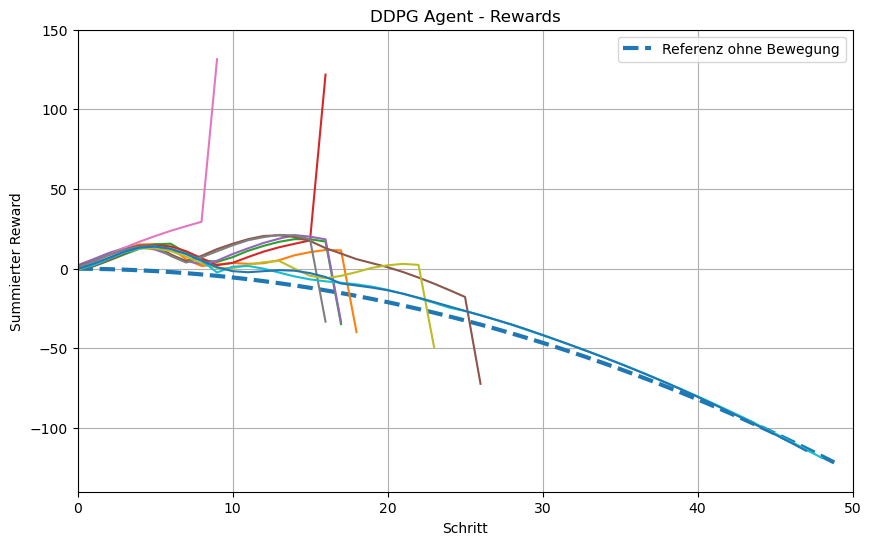

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('DDPG Agent - Rewards')
ax.set_ylabel('Summierter Reward')
ax.set_xlabel('Schritt')

ax.plot(rewards_inactive, linestyle="dashed", linewidth=3)

for er in episodes_rewards:
    ax.plot(er)
    print(len(er))

ax.legend(labels=['Referenz ohne Bewegung'])
ax.grid()
ax.set_xbound(0, 50)
ax.set_ybound(-140, 150)

# fig.savefig('ddpg_agent.png')

In [37]:
# Save data
import pandas as pd

df = pd.DataFrame([str(x) for x in episodes_rewards])

df.to_csv("DDPG_Test_3.csv")